# <center>Tarea 1 - Introducción a las Redes Neuronales Artificiales</center>
## <center> Ariel Sanhueza - 201173005-4 </center>
## <center> Diego Pérez - 201173045-3 </center>

### Previo
Primero importaremos las bibliotecas necesarias para desarrollar la tarea.

In [1]:
%matplotlib inline
import numpy as np

from numpy.random import rand
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD

import matplotlib
import matplotlib.pyplot as plt

import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn import cross_validation

Using Theano backend.


## Problema 1

### a)
Primero generamos una función que genere $n$ pares (x,y), donde $x \in [-1,1]^2, y \in \{0,1\}$, como se sugirió en el enunciado.

In [2]:
def generate_data(n):
    # Generamos la matriz con los datos, de tamaño nx3
    ndata = 2*rand(n,3) - 1
    # Calculamos el valor que corresponde a y
    for i in range(n):
        if (ndata[i,0] > 0 and ndata[i,1] > 0) or (ndata[i,0] <= 0 and ndata[i,1] <= 0):
            ndata[i,2] = 0
        else:
            ndata[i,2] = 1
    return ndata

El problema se llama **XOR** pues la función de clasificación es la de la operación "OR-Exclusive". La separación sigue la misma lógica del XOR binario. Generamos los datos de entrenamiento y prueba para luego separarlos en la *data* de entrada y la data con los outputs deseados.

In [3]:
training_dt = generate_data(1000)
test_dt = generate_data(1000)

In [4]:
# Separamos la data en entrada y salida
X_training = training_dt[:,:2]
Y_training = training_dt[:,2]
X_test = test_dt[:,:2]
Y_test = test_dt[:,2]

### b)
Procedemos a generar el modelo de una sola neurona. Se implementarán dos modelos utilizando las funciones de activación: **lineal** y **sigmoidal**. Esto se hará para demostrar que independiente de los parámetros de la neurona, el problema no puede ser resuelto por ella. Los parámetros de la compilación son seteados de acuerdo a la página oficial de *keras* sobre un ejemplo de clasificador binario.

In [66]:
# Primero modelo
model = Sequential()
model.add(Dense(1, input_dim=2, activation='linear'))

In [67]:
# Compilamos
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [68]:
# Entrenamos
data = model.fit(X_training, Y_training, nb_epoch=150)

Epoch 1/150
1000/1000 [==============================] - 0s - loss: 4.2712 - acc: 0.5300     
Epoch 2/150
1000/1000 [==============================] - 0s - loss: 4.2467 - acc: 0.5420     
Epoch 3/150
1000/1000 [==============================] - 0s - loss: 4.2545 - acc: 0.5420     
Epoch 4/150
1000/1000 [==============================] - 0s - loss: 4.2530 - acc: 0.5420     
Epoch 5/150
1000/1000 [==============================] - 0s - loss: 4.2524 - acc: 0.5450     
Epoch 6/150
1000/1000 [==============================] - 0s - loss: 4.2518 - acc: 0.5460     
Epoch 7/150
1000/1000 [==============================] - 0s - loss: 4.2513 - acc: 0.5450     
Epoch 8/150
1000/1000 [==============================] - 0s - loss: 4.2509 - acc: 0.5440     
Epoch 9/150
1000/1000 [==============================] - 0s - loss: 4.2507 - acc: 0.5450     
Epoch 10/150
1000/1000 [==============================] - 0s - loss: 4.2505 - acc: 0.5470     
Epoch 11/150
1000/1000 [==============================] - 0

In [69]:
# Evaluamos el modelo
scores = model.evaluate(X_test, Y_test)
print("\nPrecisión: {0:.2f}".format(scores[1]))

  32/1000 [..............................] - ETA: 0s
Precisión: 0.51


In [71]:
# Segundo modelo
model = Sequential()
model.add(Dense(1, input_dim=2, activation='sigmoid'))

In [72]:
# Compilamos
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [73]:
# Entrenamos
data = model.fit(X_training, Y_training, nb_epoch=150)

Epoch 1/150
1000/1000 [==============================] - 0s - loss: 0.7651 - acc: 0.4980     
Epoch 2/150
1000/1000 [==============================] - 0s - loss: 0.7617 - acc: 0.4970     
Epoch 3/150
1000/1000 [==============================] - 0s - loss: 0.7588 - acc: 0.4990     
Epoch 4/150
1000/1000 [==============================] - 0s - loss: 0.7558 - acc: 0.4970     
Epoch 5/150
1000/1000 [==============================] - 0s - loss: 0.7530 - acc: 0.5000     
Epoch 6/150
1000/1000 [==============================] - 0s - loss: 0.7503 - acc: 0.4990     
Epoch 7/150
1000/1000 [==============================] - 0s - loss: 0.7477 - acc: 0.4990     
Epoch 8/150
1000/1000 [==============================] - 0s - loss: 0.7453 - acc: 0.5000     
Epoch 9/150
1000/1000 [==============================] - 0s - loss: 0.7429 - acc: 0.4980     
Epoch 10/150
1000/1000 [==============================] - 0s - loss: 0.7404 - acc: 0.4990     
Epoch 11/150
1000/1000 [==============================] - 0

In [74]:
# Evaluamos el modelo
scores = model.evaluate(X_test, Y_test)
print("\nPrecisión: {0:.2f}%".format(scores[1]*100))

  32/1000 [..............................] - ETA: 0s
Precisión: 47.70%


Como se puede ver en ambos modelos, la precisión de clasificación en el conjunto de prueba es de aproximadamente un 50~60%. Esto se debe a que una sola neurona solo puede aproximar funciones lineales y por lo tanto solo puede resolver problemas linealmente separables. Dado que el problema **XOR** no es linealmente separable, utilizando una sola recta se tiene en aproximadamente un 50% de precisión teórica.

### c)
Ahora veremos para un modelo de 3 capas, con 10 neuronas en la capa oculta. La activación de las capas ocultas será una función Tangente Hiperbólica. La capa de salida tendrá activación lineal.

In [161]:
# Creamos la red con sus parámetros
model = Sequential()
model.add(Dense(10, input_dim=2, activation='tanh'))
model.add(Dense(1, activation='linear'))

In [162]:
# Compilamos
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [163]:
# Entrenamos
data = model.fit(X_training, Y_training, nb_epoch=30)

Epoch 1/30
1000/1000 [==============================] - 0s - loss: 0.8587 - acc: 0.4930     
Epoch 2/30
1000/1000 [==============================] - 0s - loss: 0.6645 - acc: 0.6150     
Epoch 3/30
1000/1000 [==============================] - 0s - loss: 0.6472 - acc: 0.7150     
Epoch 4/30
1000/1000 [==============================] - 0s - loss: 0.6320 - acc: 0.7480     
Epoch 5/30
1000/1000 [==============================] - 0s - loss: 0.6160 - acc: 0.7790     
Epoch 6/30
1000/1000 [==============================] - 0s - loss: 0.6016 - acc: 0.8220     
Epoch 7/30
1000/1000 [==============================] - 0s - loss: 0.5845 - acc: 0.8510     
Epoch 8/30
1000/1000 [==============================] - 0s - loss: 0.5683 - acc: 0.8480     
Epoch 9/30
1000/1000 [==============================] - 0s - loss: 0.5519 - acc: 0.8790     
Epoch 10/30
1000/1000 [==============================] - 0s - loss: 0.5333 - acc: 0.9040     
Epoch 11/30
1000/1000 [==============================] - 0s - loss: 0

In [164]:
# Evaluamos el modelo
scores = model.evaluate(X_test, Y_test)
print("\nPrecisión: {0:.2f}%".format(scores[1]*100))

  32/1000 [..............................] - ETA: 0s
Precisión: 94.90%


Como se puede ver en este experimento utilizando el modelo descrito la precisión en el set de prueba es de un 94.90% por lo que, dependiendo de los parámetros escogidos, el problema sí es resolvible mediante un perceptrón multicapas.

## Problema 2

### a)
Obtenemos los datos del link facilitado. Las líneas realizan (utilizando la enumeración del enunciado de la tarea):
* Línea 3: Se lee el CSV desde la URL entregada. Se marca el caracter ',' como separador de los datos y el parámetro *names* indica los nombres que tendrá cada columna.
* Línea 4: importa desde sklearn la función train_test_split que separa el dataset entre datos de entrenamiento y testing de forma aleatoria.
* Línea 5: Aplica train_test_split para separar en subconjuntos de entrenamiento y testeo utilizando un porcentaje fijo (25%) para la prueba.

In [166]:
url = 'http://mldata.org/repository/data/download/csv/regression-datasets-housing/'

df = pd.read_csv(url, sep=',',header=None, names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'])
df_train,df_test= train_test_split(df,test_size=0.25, random_state=0)

### b)
El dataset contiene:
* El tipo de la variable *df* es DataFrame, un tipo de datos de la bilioteca *pandas*.
* 506 filas enumeradas desde el 0 hasta el 505.
* Memoria que utiliza el Dataset (tamaño).
* Una descripción de cada columna con:
    * El nombre de la columna.
    * La cantidad de datos en la columna.
    * Si hay datos nulos (datos faltantes).
    * El tipo de dato que contiene esa columna.

In [167]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null int64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null int64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(9), int64(5)
memory usage: 55.4 KB


CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.347826   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.310593    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677082   12.000000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.083004  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.280574   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.000000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.000000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.000000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.000000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

### c)
Cuando los datos vienen en escalas muy diferentes puede llevar a que las características con valores numéricos más grandes logren mayor peso frente a los de menor valor (por ejemplo a la hora de calcular distancias). Normalizar los datos permite que todos los datos tengan un aporte "igualitario" a la hora de entrenar la red y de calcular los pesos.

In [168]:
# Datos de entrenamiento
scaler = StandardScaler().fit(df_train)
X_train_scaled = pd.DataFrame(scaler.transform(df_train),columns=df_train.columns)
y_train_scaled = X_train_scaled.pop('MEDV')
# Datos de testing
scaler2 = StandardScaler().fit(df_test)
X_test_scaled = pd.DataFrame(scaler2.transform(df_test),columns=df_test.columns)
y_test_scaled = X_test_scaled.pop('MEDV')

### d)

In [48]:
model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], init='uniform'))
model.add(Activation('sigmoid'))
model.add(Dense(1, init='uniform'))
model.add(Activation('linear'))

sgd = SGD(lr=0.2)
model.compile(optimizer=sgd,loss='mean_squared_error')

hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300, verbose=1, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: 191992917638297639976960.0000 - val_loss: 402094062750811680761970688.0000
Epoch 2/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan                  
Epoch 3/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 4/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 5/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 6/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 7/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 8/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 9/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 10/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 11/300
379/379

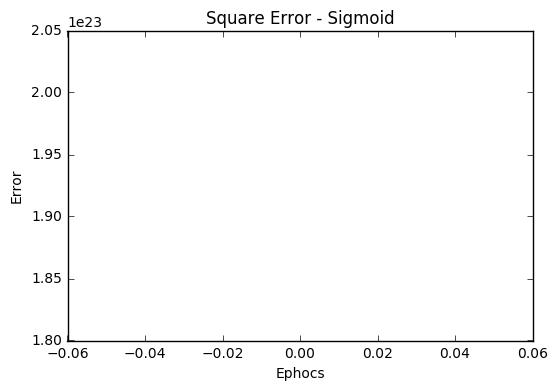

In [49]:
plt.plot(hist.history['loss'])
plt.title('Square Error - Sigmoid')
plt.xlabel('Ephocs')
plt.ylabel('Error')
plt.show()

Como se puede ver en el output generador, el método diverge con los parámetros entregados. El gráfico no muestra nada pues no se obtuvieron resultados.

### e)

In [15]:
model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], init='uniform'))
model.add(Activation('relu'))
model.add(Dense(1, init='uniform'))
model.add(Activation('linear'))

sgd = SGD(lr=0.2)
model.compile(optimizer=sgd,loss='mean_squared_error')

hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300, verbose=1, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: 0.4305 - val_loss: 0.3412
Epoch 2/300
379/379 [==============================] - 0s - loss: 0.2065 - val_loss: 0.3198
Epoch 3/300
379/379 [==============================] - 0s - loss: 0.1724 - val_loss: 0.3073
Epoch 4/300
379/379 [==============================] - 0s - loss: 0.1442 - val_loss: 0.3660
Epoch 5/300
379/379 [==============================] - 0s - loss: 0.1566 - val_loss: 0.2539
Epoch 6/300
379/379 [==============================] - 0s - loss: 0.1503 - val_loss: 0.4369
Epoch 7/300
379/379 [==============================] - 0s - loss: 0.1456 - val_loss: 0.2977
Epoch 8/300
379/379 [==============================] - 0s - loss: 0.1436 - val_loss: 0.2655
Epoch 9/300
379/379 [==============================] - 0s - loss: 0.1709 - val_loss: 0.2327
Epoch 10/300
379/379 [==============================] - 0s - loss: 0.1136 - val_loss: 0.4473
Epoch 11/300
379/379 [===========

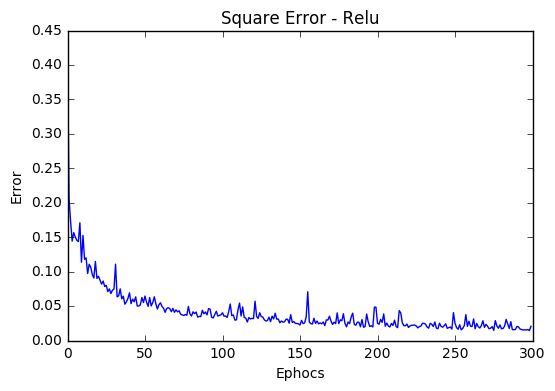

In [16]:
plt.plot(hist.history['loss'])
plt.title("Square Error - Relu")
plt.xlabel('Ephocs')
plt.ylabel('Error')
plt.show()

A diferencia del modelo anterior, utilizando la función *relu* el modelo sí converge. El gráfico muestra que a medida que aumenta el número de ephocs el error disminuye de manera asintótica quedando aproximadamente en 0.025.


### f)

In [51]:
# Generamos los n learning rates
n_lr = 20
lear_rate = np.linspace(0,1,n_lr)

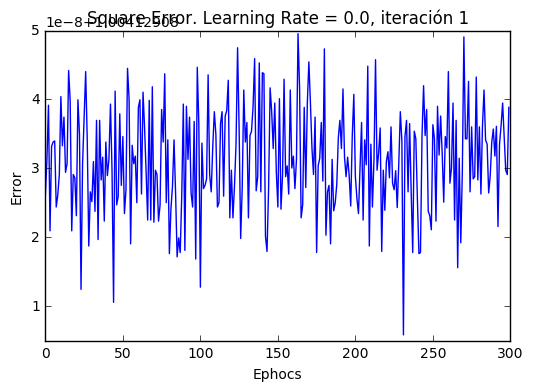

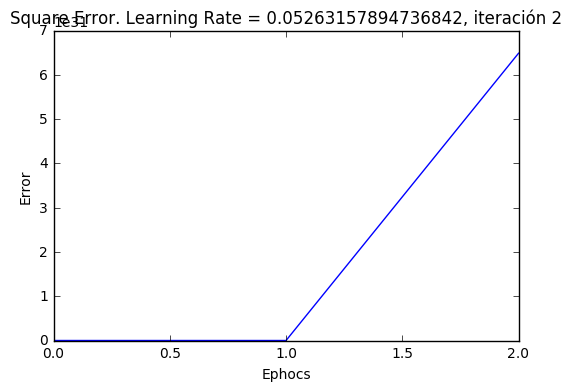

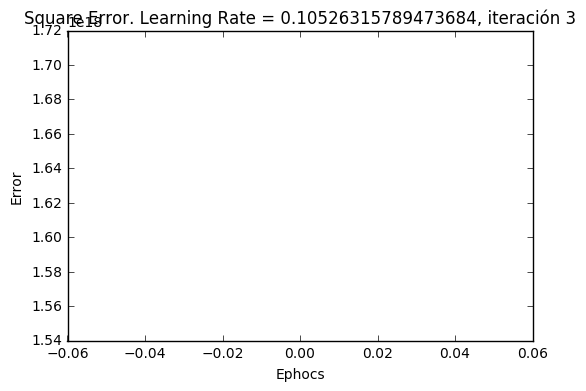

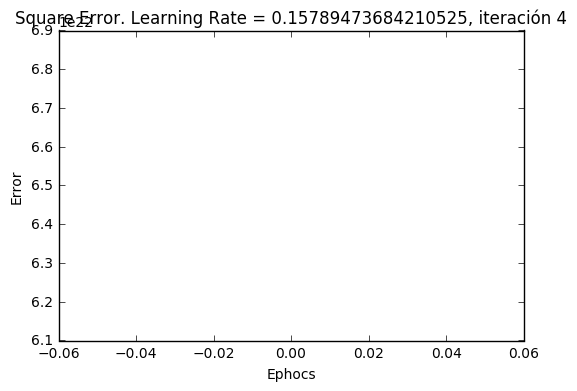

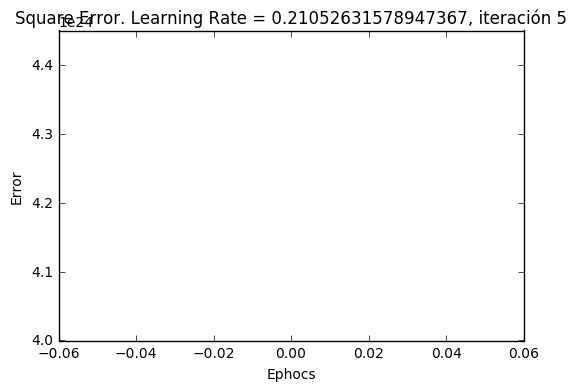

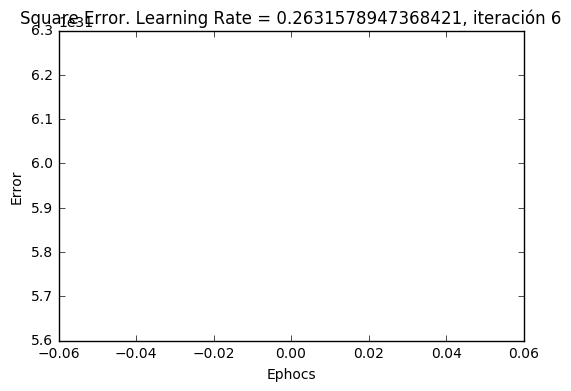

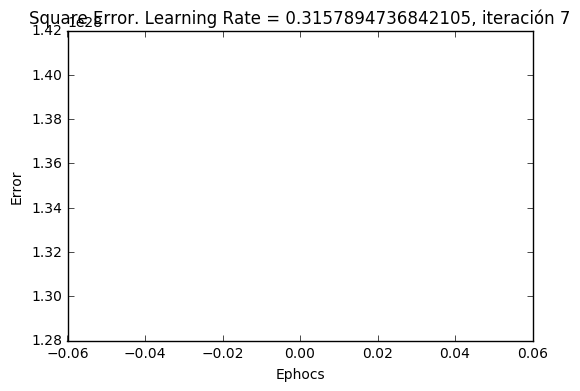

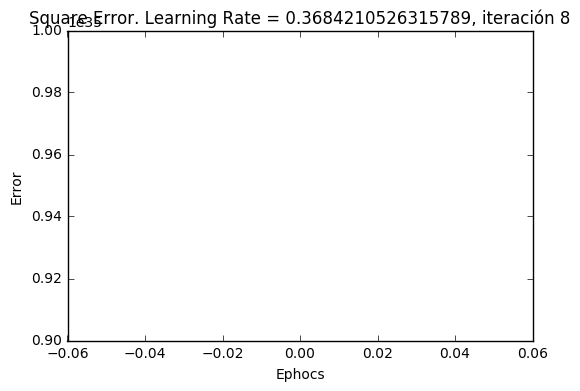

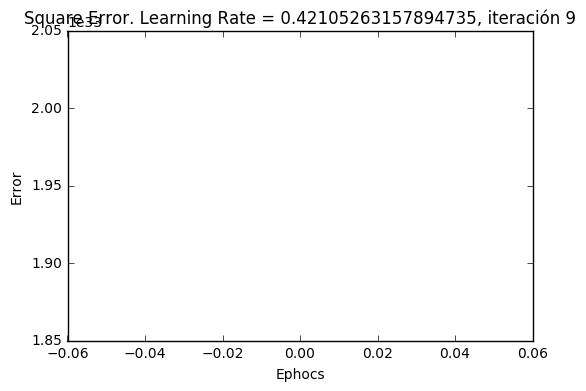

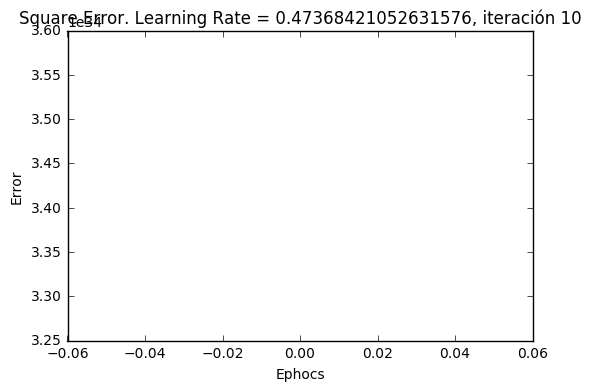

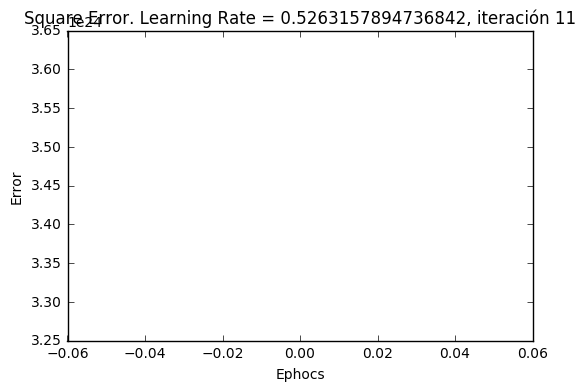

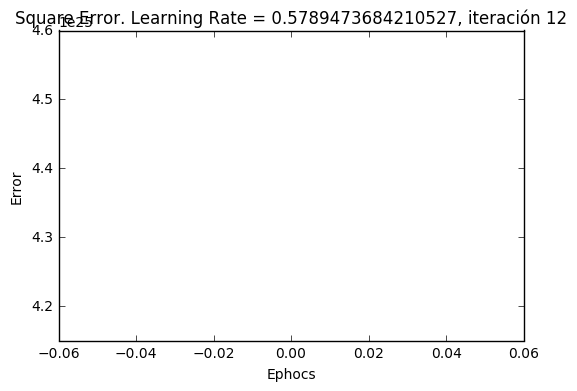

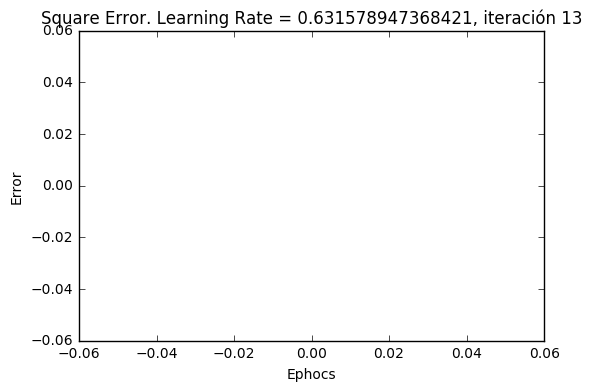

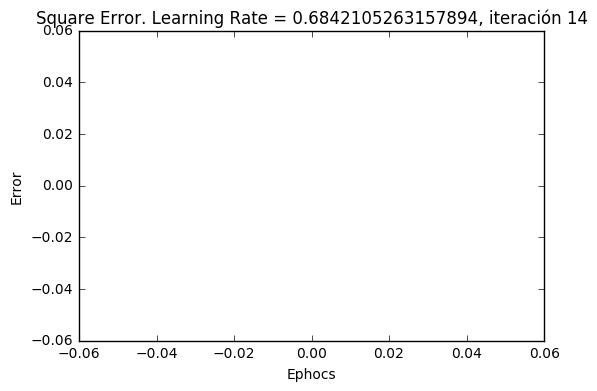

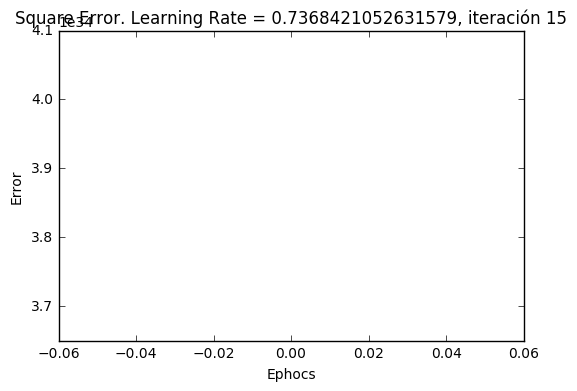

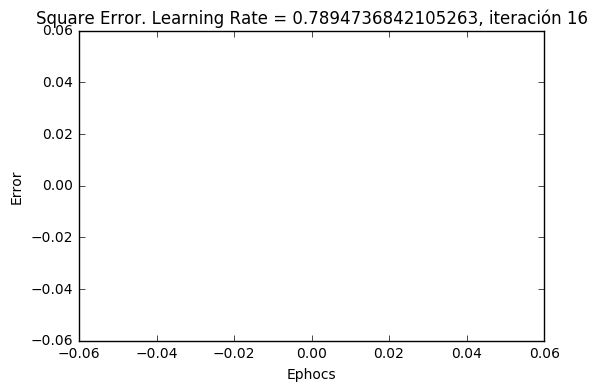

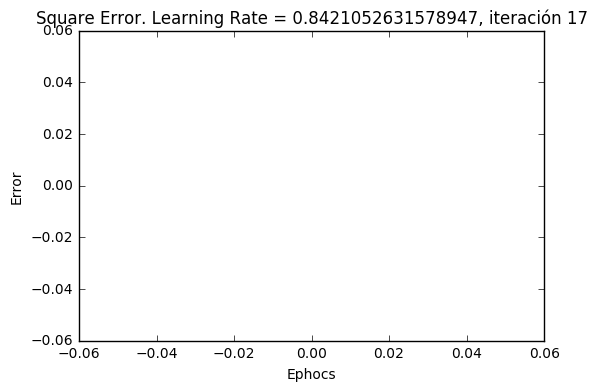

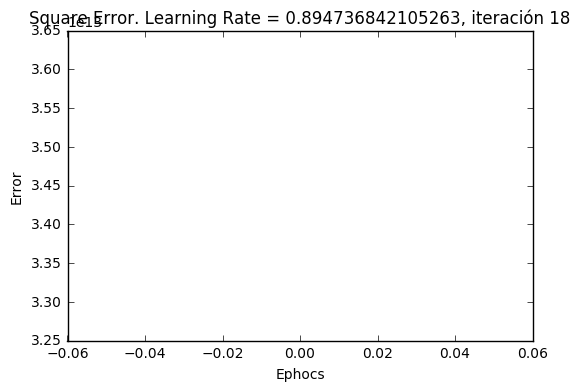

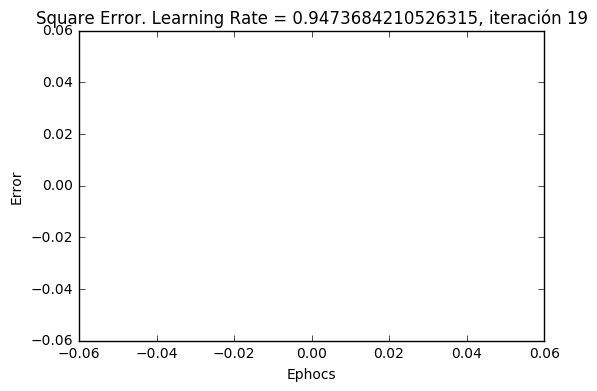

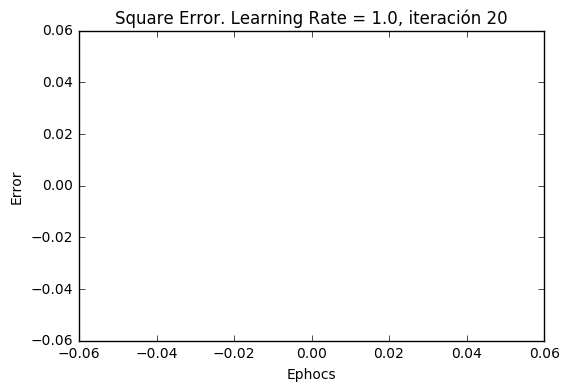

In [52]:
i = 1
for rate in lear_rate:
    model = Sequential()
    model.add(Dense(200, input_dim=X_train_scaled.shape[1], init='uniform'))
    model.add(Activation('sigmoid'))
    model.add(Dense(1, init='uniform'))
    model.add(Activation('linear'))

    sgd = SGD(lr=rate)
    model.compile(optimizer=sgd,loss='mean_squared_error')

    hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300, verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
    
    # Graficamos
    plt.plot(hist.history['loss'])
    plt.title("Square Error. Learning Rate = {0}, iteración {1}".format(rate, i))
    plt.xlabel('Ephocs')
    plt.ylabel('Error')
    plt.show()
    i += 1

Este método se probó en d) y no logró convergencia. Como se ve en el gráfico, los modelos generados variando el learning rate no convergen para ningún valor en el rango utilizado.

### g)

Primero probamos para la sigmoidal, con K = 5.

In [53]:
Xm = X_train_scaled.as_matrix()
ym = y_train_scaled.as_matrix()
kfold = cross_validation.KFold(len(Xm), 5)
cvscores = []

for i, (train, val) in enumerate(kfold):
    # create model
    model = Sequential()
    model.add(Dense(200, input_dim=Xm.shape[1], init='uniform'))
    model.add(Activation('sigmoid'))
    model.add(Dense(1, init='uniform'))
    model.add(Activation('linear'))
    # Compile model
    sgd = SGD(lr=0.2)
    model.compile(optimizer=sgd,loss='mean_squared_error')
    # Fit the model
    model.fit(Xm[train], ym[train], nb_epoch=300)
    # evaluate the model
    scores = model.evaluate(Xm[val], ym[val])
    cvscores.append(scores)
mse_cv = np.mean(cvscores)

Epoch 1/300
303/303 [==============================] - 0s - loss: 68359616177028366336.0000
Epoch 2/300
303/303 [==============================] - 0s - loss: nan                               
Epoch 3/300
303/303 [==============================] - 0s - loss: nan     
Epoch 4/300
303/303 [==============================] - 0s - loss: nan     
Epoch 5/300
303/303 [==============================] - 0s - loss: nan     
Epoch 6/300
303/303 [==============================] - 0s - loss: nan     
Epoch 7/300
303/303 [==============================] - 0s - loss: nan     
Epoch 8/300
303/303 [==============================] - 0s - loss: nan     
Epoch 9/300
303/303 [==============================] - 0s - loss: nan     
Epoch 10/300
303/303 [==============================] - 0s - loss: nan     
Epoch 11/300
303/303 [==============================] - 0s - loss: nan     
Epoch 12/300
303/303 [==============================] - 0s - loss: nan     
Epoch 13/300
303/303 [==============================] 

In [54]:
print("Error total del modelo: {0}%".format(mse_cv*100))

Error total del modelo: nan%


Para K = 10, función sigmoidal.

In [46]:
Xm = X_train_scaled.as_matrix()
ym = y_train_scaled.as_matrix()
kfold = cross_validation.KFold(len(Xm), 10)
cvscores = []

for i, (train, val) in enumerate(kfold):
    # create model
    model = Sequential()
    model.add(Dense(200, input_dim=Xm.shape[1], init='uniform'))
    model.add(Activation('sigmoid'))
    model.add(Dense(1, init='uniform'))
    model.add(Activation('linear'))
    # Compile model
    sgd = SGD(lr=0.2)
    model.compile(optimizer=sgd,loss='mean_squared_error')
    # Fit the model
    model.fit(Xm[train], ym[train], nb_epoch=300)
    # evaluate the model
    scores = model.evaluate(Xm[val], ym[val])
    cvscores.append(scores)
mse_cv = np.mean(cvscores)

Epoch 1/300
341/341 [==============================] - 0s - loss: 104848881256532169271017472.0000
Epoch 2/300
341/341 [==============================] - 0s - loss: nan                                     
Epoch 3/300
341/341 [==============================] - 0s - loss: nan     
Epoch 4/300
341/341 [==============================] - 0s - loss: nan     
Epoch 5/300
341/341 [==============================] - 0s - loss: nan     
Epoch 6/300
341/341 [==============================] - 0s - loss: nan     
Epoch 7/300
341/341 [==============================] - 0s - loss: nan     
Epoch 8/300
341/341 [==============================] - 0s - loss: nan     
Epoch 9/300
341/341 [==============================] - 0s - loss: nan     
Epoch 10/300
341/341 [==============================] - 0s - loss: nan     
Epoch 11/300
341/341 [==============================] - 0s - loss: nan     
Epoch 12/300
341/341 [==============================] - 0s - loss: nan     
Epoch 13/300
341/341 [===================

In [47]:
print("Error total del modelo: {0}%".format(mse_cv*100))

Error total del modelo: nan%


Ahora utilizaremos la función Relu con K = 5.

In [55]:
Xm = X_train_scaled.as_matrix()
ym = y_train_scaled.as_matrix()
kfold = cross_validation.KFold(len(Xm), 5)
cvscores = []

for i, (train, val) in enumerate(kfold):
    # create model
    model = Sequential()
    model.add(Dense(200, input_dim=Xm.shape[1], init='uniform'))
    model.add(Activation('relu'))
    model.add(Dense(1, init='uniform'))
    model.add(Activation('linear'))
    # Compile model
    sgd = SGD(lr=0.2)
    model.compile(optimizer=sgd,loss='mean_squared_error')
    # Fit the model
    model.fit(Xm[train], ym[train], nb_epoch=300)
    # evaluate the model
    scores = model.evaluate(Xm[val], ym[val])
    cvscores.append(scores)
mse_cv = np.mean(cvscores)

Epoch 1/300
303/303 [==============================] - 0s - loss: 0.5642     
Epoch 2/300
303/303 [==============================] - 0s - loss: 0.2128     
Epoch 3/300
303/303 [==============================] - 0s - loss: 0.2042     
Epoch 4/300
303/303 [==============================] - 0s - loss: 0.2068     
Epoch 5/300
303/303 [==============================] - 0s - loss: 0.1857     
Epoch 6/300
303/303 [==============================] - 0s - loss: 0.1365     
Epoch 7/300
303/303 [==============================] - 0s - loss: 0.1595     
Epoch 8/300
303/303 [==============================] - 0s - loss: 0.1523     
Epoch 9/300
303/303 [==============================] - 0s - loss: 0.1393     
Epoch 10/300
303/303 [==============================] - 0s - loss: 0.1256     
Epoch 11/300
303/303 [==============================] - 0s - loss: 0.1391     
Epoch 12/300
303/303 [==============================] - 0s - loss: 0.1143     
Epoch 13/300
303/303 [==============================] - 0s - 

In [56]:
print("Error total del modelo: {0}%".format(mse_cv*100))

Error total del modelo: 13.506776839912984%


Finalmente probaremos con K = 10 utilizando la función Relu.

In [57]:
Xm = X_train_scaled.as_matrix()
ym = y_train_scaled.as_matrix()
kfold = cross_validation.KFold(len(Xm), 10)
cvscores = []

for i, (train, val) in enumerate(kfold):
    # create model
    model = Sequential()
    model.add(Dense(200, input_dim=Xm.shape[1], init='uniform'))
    model.add(Activation('relu'))
    model.add(Dense(1, init='uniform'))
    model.add(Activation('linear'))
    # Compile model
    sgd = SGD(lr=0.2)
    model.compile(optimizer=sgd,loss='mean_squared_error')
    # Fit the model
    model.fit(Xm[train], ym[train], nb_epoch=300)
    # evaluate the model
    scores = model.evaluate(Xm[val], ym[val])
    cvscores.append(scores)
mse_cv = np.mean(cvscores)

Epoch 1/300
341/341 [==============================] - 0s - loss: 0.4482     
Epoch 2/300
341/341 [==============================] - 0s - loss: 0.1956     
Epoch 3/300
341/341 [==============================] - 0s - loss: 0.1824     
Epoch 4/300
341/341 [==============================] - 0s - loss: 0.1862     
Epoch 5/300
341/341 [==============================] - 0s - loss: 0.1772     
Epoch 6/300
341/341 [==============================] - 0s - loss: 0.1590     
Epoch 7/300
341/341 [==============================] - 0s - loss: 0.1477     
Epoch 8/300
341/341 [==============================] - 0s - loss: 0.1345     
Epoch 9/300
341/341 [==============================] - 0s - loss: 0.1246     
Epoch 10/300
341/341 [==============================] - 0s - loss: 0.1647     
Epoch 11/300
341/341 [==============================] - 0s - loss: 0.1115     
Epoch 12/300
341/341 [==============================] - 0s - loss: 0.1234     
Epoch 13/300
341/341 [==============================] - 0s - 

In [58]:
print("Error total del modelo: {0}%".format(mse_cv*100))

Error total del modelo: 12.525337985193469%


El modelo utilizando la función de activación sigmoidal no convergió en ninguno de los test utilizando *Cross Validation* por lo que el error que se obtuvo fue *NaN*. Por el contrario el modelo con la función *Relu* si logró convergencia y *Cross Validation* mostró un error un error en el modelo de aproximadamente 13%. Cabe destacar que los parámetros que se utilizaron en el modelo convergente fueron un learning rate de 0.2 y 300 epoch.

### h)

In [169]:
n_decay = 10
lear_decay = np.logspace(-6,0,n_decay)

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: 2370344700487127269376.0000 - val_loss: 5929392986860083352698880.0000
Epoch 2/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan                
Epoch 3/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 4/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 5/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 6/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 7/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 8/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 9/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 10/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 11/300
379/379 [====

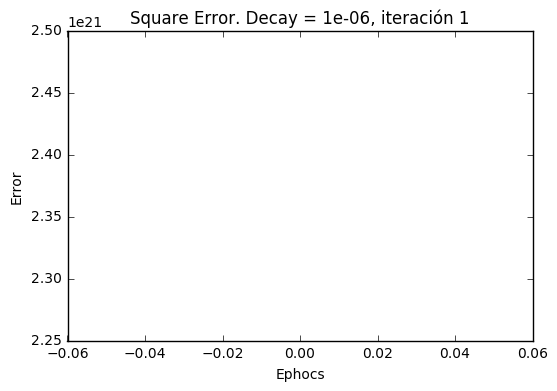

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: 16146450820010107922808832.0000 - val_loss: 150697544572032083137795194880.0000
Epoch 2/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan                     
Epoch 3/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 4/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 5/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 6/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 7/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 8/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 9/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 10/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 11/300

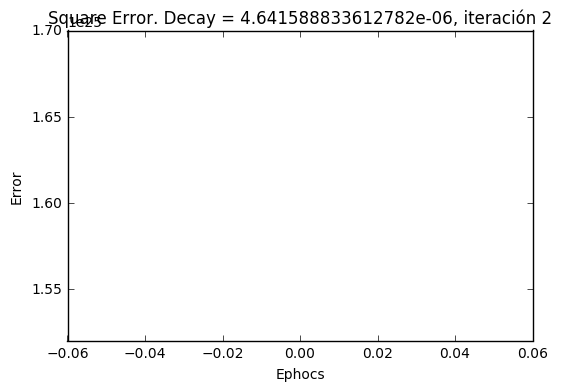

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: 1998317645352081152.0000 - val_loss: 8282269237788112060416.0000
Epoch 2/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan             
Epoch 3/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 4/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 5/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 6/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 7/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 8/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 9/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 10/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 11/300
379/379 [=============

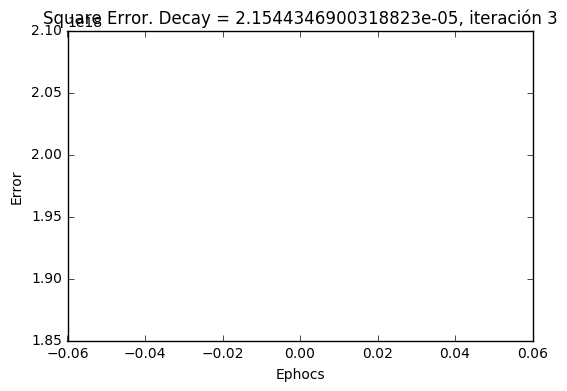

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: 9392529241843838871949803520.0000 - val_loss: 144868178765144444118202757152768.0000
Epoch 2/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan                        
Epoch 3/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 4/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 5/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 6/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 7/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 8/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 9/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 10/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoc

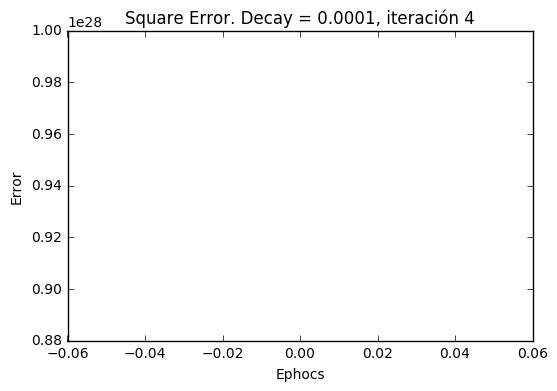

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: 47771279204522221734199296.0000 - val_loss: 191857045917635128219727298560.0000
Epoch 2/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan                     
Epoch 3/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 4/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 5/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 6/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 7/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 8/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 9/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 10/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 11/300

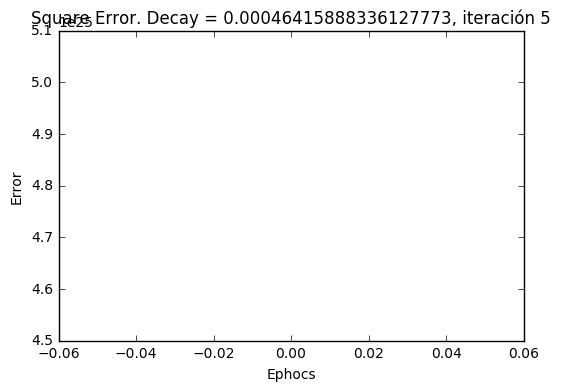

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: 442638.9462 - val_loss: 9540490941.4803
Epoch 2/300
379/379 [==============================] - 0s - loss: 22846455895163913545030428818145280.0000 - val_loss: inf
Epoch 3/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 4/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 5/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 6/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 7/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 8/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 9/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 10/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 11/300
379/379 [==============

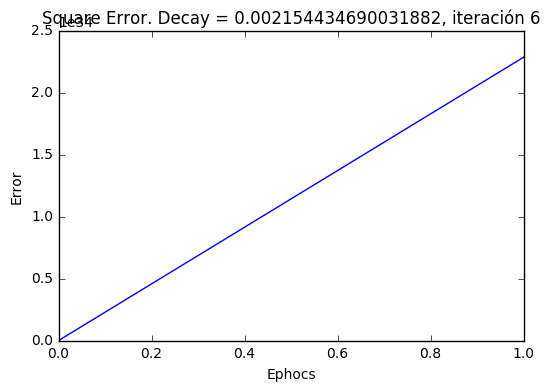

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: 418352217778324504576.0000 - val_loss: 726112986048663421714432.0000
Epoch 2/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan               
Epoch 3/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 4/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 5/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 6/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 7/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 8/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 9/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 10/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 11/300
379/379 [=======

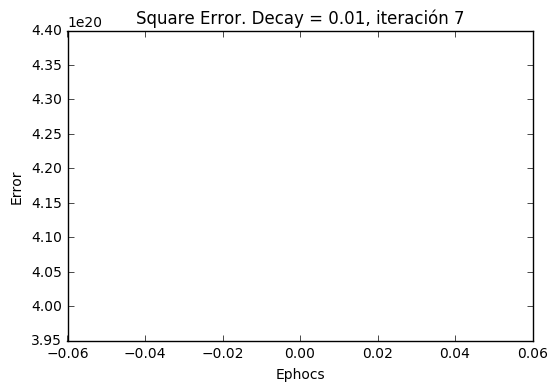

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: 339142360649701473124352.0000 - val_loss: 450430233575099057404116992.0000
Epoch 2/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan                  
Epoch 3/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 4/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 5/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 6/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 7/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 8/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 9/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 10/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 11/300
379/379

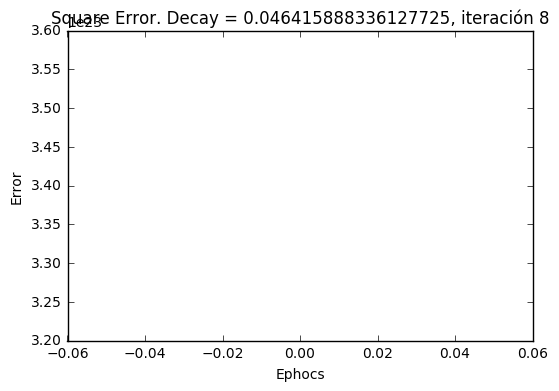

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: 966121998164950912.0000 - val_loss: 218255744592718233600.0000
Epoch 2/300
379/379 [==============================] - 0s - loss: 138497990890730522184817573888.0000 - val_loss: 2650527979030593269639482966016.0000
Epoch 3/300
379/379 [==============================] - 0s - loss: 193182091933516730720441912524800.0000 - val_loss: 2474090838505830456193000941813760.0000
Epoch 4/300
379/379 [==============================] - 0s - loss: 604248467601266354604182159228928.0000 - val_loss: 2427084124801297286663101218816.0000
Epoch 5/300
379/379 [==============================] - 0s - loss: 1721761767083154485865370091520.0000 - val_loss: 1614191039075784078162439176192.0000
Epoch 6/300
379/379 [==============================] - 0s - loss: 1054286834958094646885486690304.0000 - val_loss: 1010228187869033615027389595648.0000
Epoch 7/300
379/379 [==============================] - 0s -

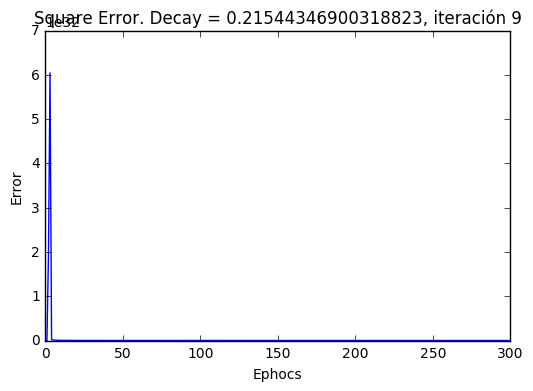

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: 35495178506.7643 - val_loss: 1701748371.1496
Epoch 2/300
379/379 [==============================] - 0s - loss: 381346036.2427 - val_loss: 75547576.8189
Epoch 3/300
379/379 [==============================] - 0s - loss: 90187633.2454 - val_loss: 68040315.5906
Epoch 4/300
379/379 [==============================] - 0s - loss: 77033533.5092 - val_loss: 56671986.8346
Epoch 5/300
379/379 [==============================] - 0s - loss: 65534615.0079 - val_loss: 53864419.0236
Epoch 6/300
379/379 [==============================] - 0s - loss: 62940236.9815 - val_loss: 56547549.4803
Epoch 7/300
379/379 [==============================] - 0s - loss: 61036705.0660 - val_loss: 53936281.9528
Epoch 8/300
379/379 [==============================] - 0s - loss: 58460644.7916 - val_loss: 50717440.4094
Epoch 9/300
379/379 [==============================] - 0s - loss: 55517489.8470 - val_loss: 49110675

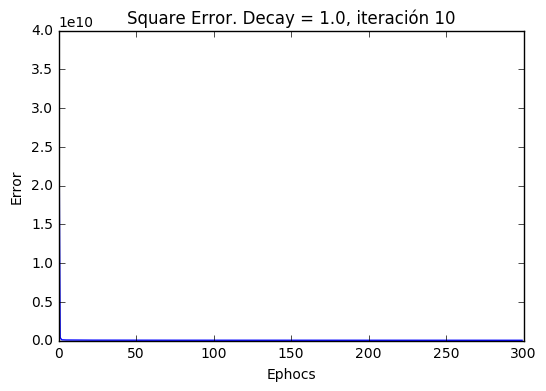

In [170]:
i = 1
for decay in lear_decay:
    model = Sequential()
    model.add(Dense(200, input_dim=X_train_scaled.shape[1], init='uniform'))
    model.add(Activation('sigmoid'))
    model.add(Dense(1, init='uniform'))
    model.add(Activation('linear'))

    sgd = SGD(lr=0.2, decay=decay)
    model.compile(optimizer=sgd,loss='mean_squared_error')

    hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300, verbose=1, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
    # Graficamos
    plt.plot(hist.history['loss'])
    plt.title("Square Error. Decay = {0}, iteración {1}".format(decay, i))
    plt.xlabel('Ephocs')
    plt.ylabel('Error')
    plt.show()
    i += 1

La modificación del *decay* no mejoró la convergencia del modelo. El método sigue divergiendo para la mayoría de los Decay. En los dos últimos casos se consiguen resultados y lograron que el método obtenga algún tipo de resultado pero con errores altos.

### i)

In [61]:
n_decay = 21
momentum = np.linspace(0,1,n_decay)

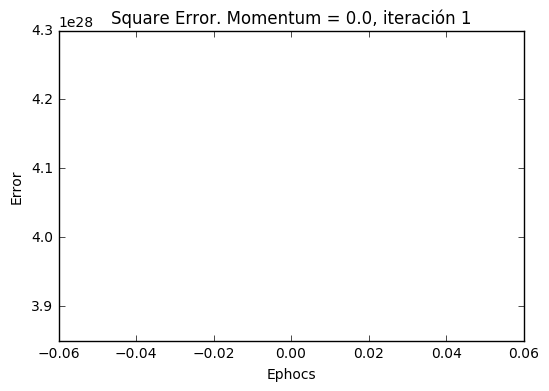

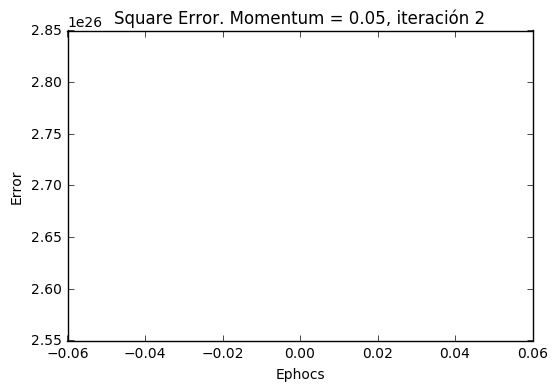

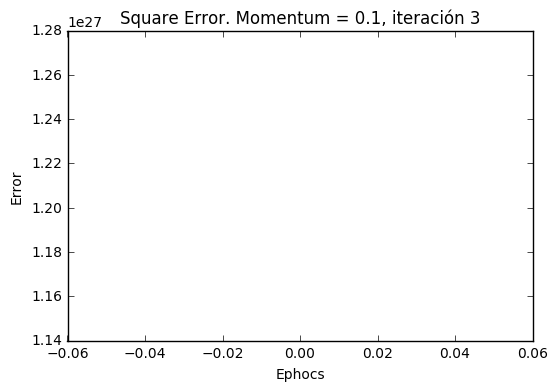

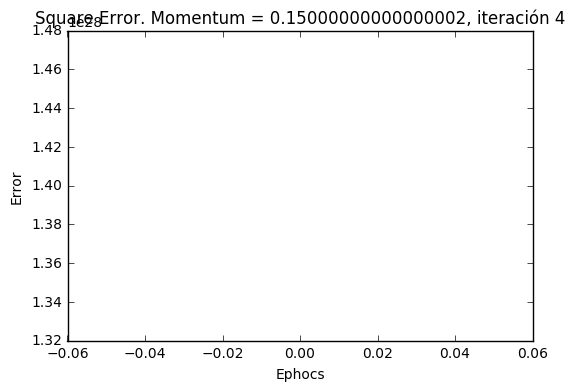

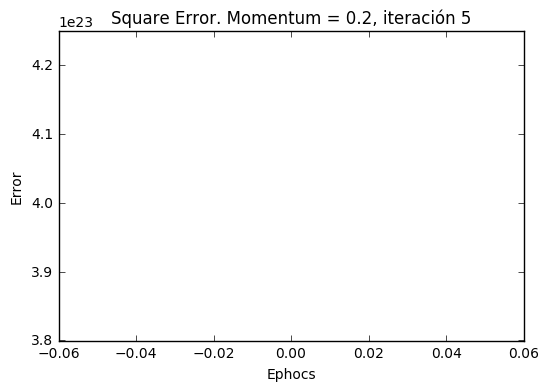

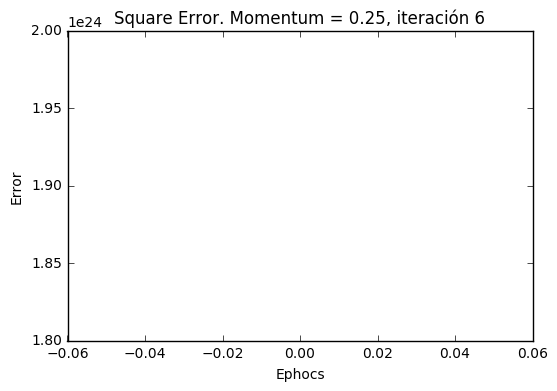

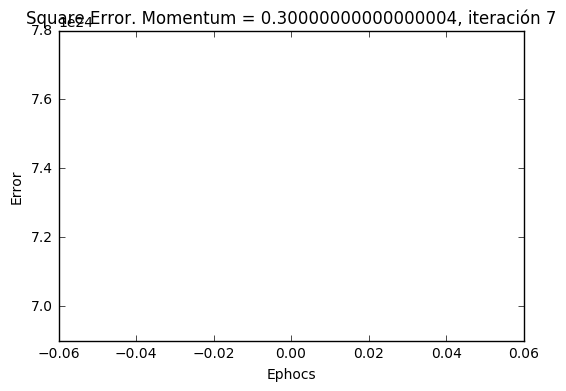

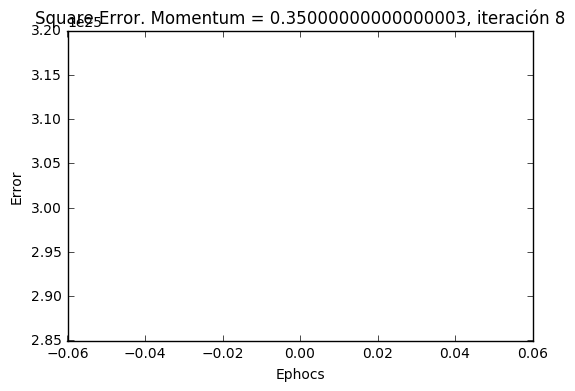

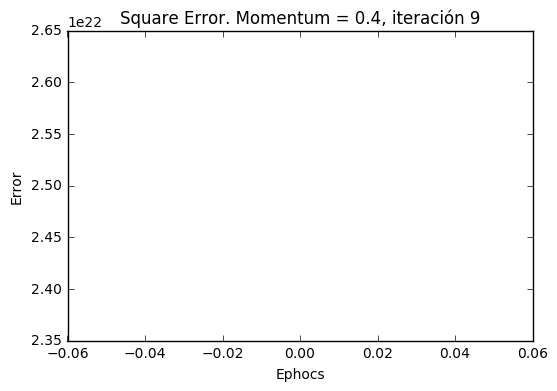

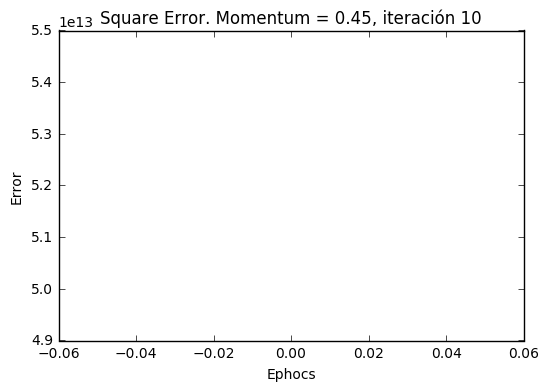

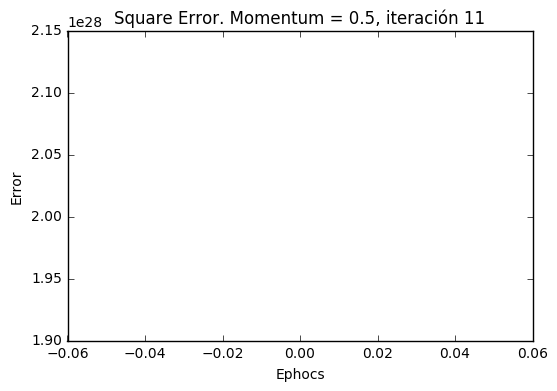

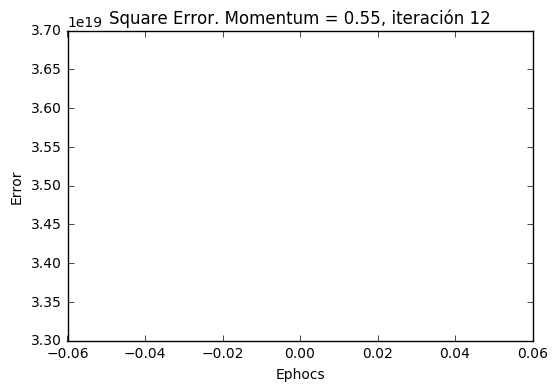

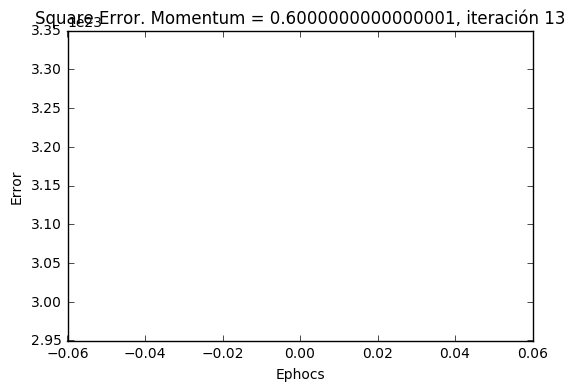

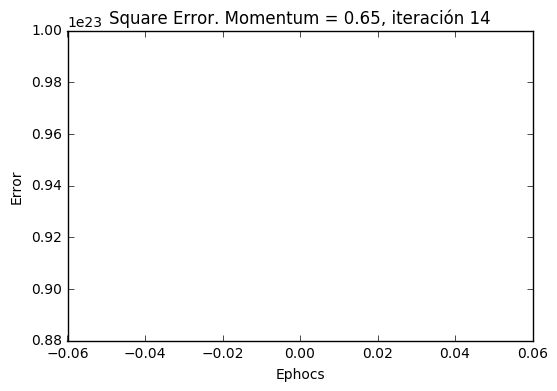

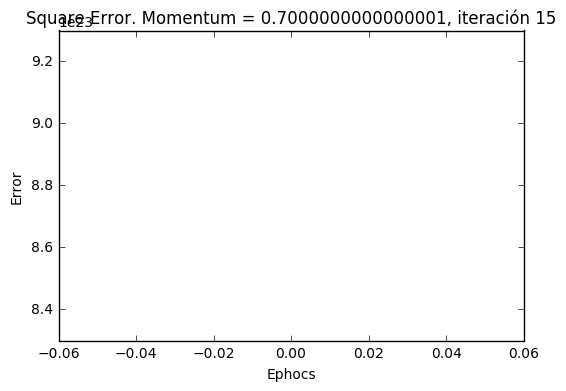

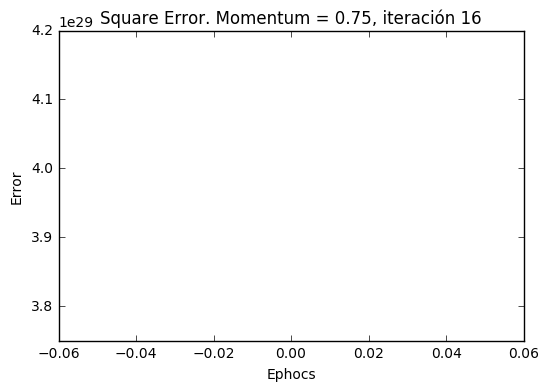

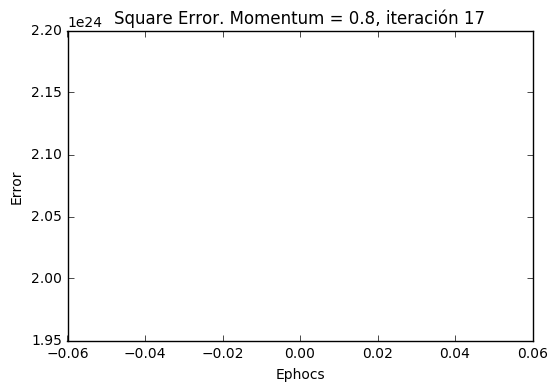

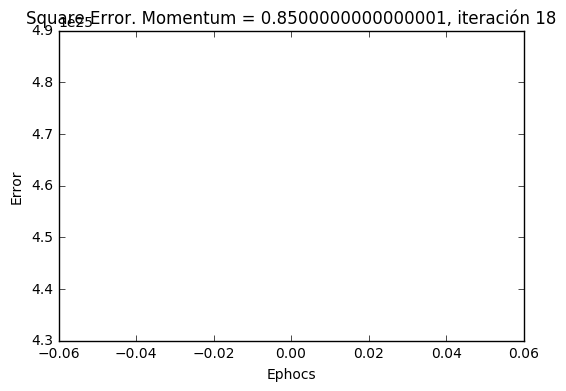

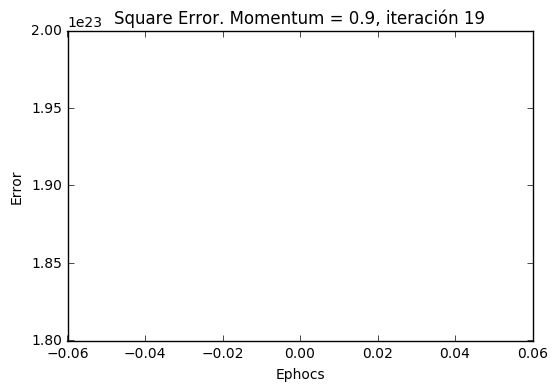

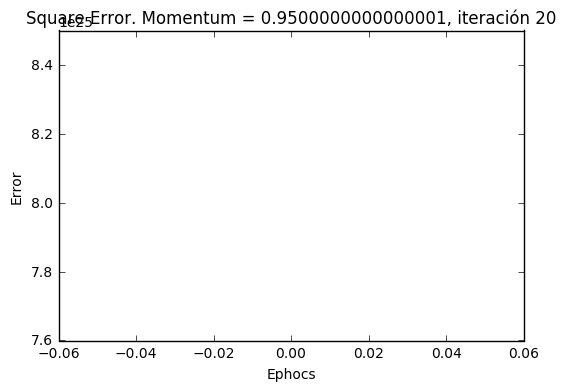

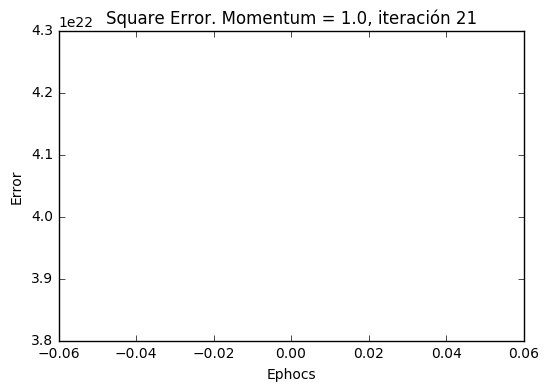

In [62]:
i = 1
for mom in momentum:
    model = Sequential()
    model.add(Dense(200, input_dim=X_train_scaled.shape[1], init='uniform'))
    model.add(Activation('sigmoid'))
    model.add(Dense(1, init='uniform'))
    model.add(Activation('linear'))

    sgd = SGD(lr=0.2,momentum=mom)
    model.compile(optimizer=sgd,loss='mean_squared_error')

    hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300, verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
    # Graficamos
    plt.plot(hist.history['loss'])
    plt.title("Square Error. Momentum = {0}, iteración {1}".format(mom, i))
    plt.xlabel('Ephocs')
    plt.ylabel('Error')
    plt.show()
    i += 1

Como se puede ver en los gráficos, ninguno de los momentum utilizados permitió ayudar al método a converger por lo que no hubo diferencia en variar el momentum.

### j)

In [172]:
n_batches = 21
batch_sizes = np.round(np.linspace(1,X_train_scaled.shape[0],n_batches))

Primero analizamos como influye el tamaño del *batch* en el modelo con función sigmoidal.

Train on 379 samples, validate on 127 samples
Epoch 1/300
368/379 [============================>.] - ETA: 0s - loss: nan

/Users/asanhuez/.miniconda2/envs/python3/lib/python3.5/site-packages/keras/engine/training.py:810: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  batch_ids = index_array[batch_start:batch_end]


379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 2/300
326/379 [========================>.....] - ETA: 0s - loss: nan

/Users/asanhuez/.miniconda2/envs/python3/lib/python3.5/site-packages/keras/engine/training.py:917: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  batch_ids = index_array[batch_start:batch_end]


379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 3/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 4/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 5/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 6/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 7/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 8/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 9/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 10/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 11/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 12/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 13/300
379/379 [==============================] - 0s - lo

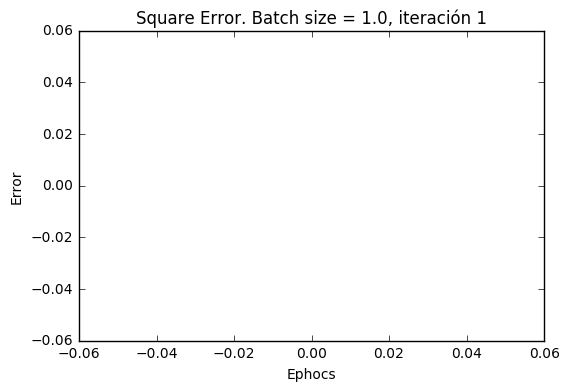

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 2/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 3/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 4/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 5/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 6/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 7/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 8/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 9/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 10/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 11/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 

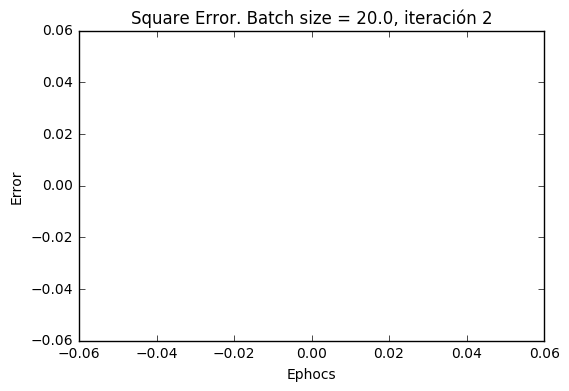

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: 2521349705903064481792.0000 - val_loss: 6786910079409045505048576.0000
Epoch 2/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan                
Epoch 3/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 4/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 5/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 6/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 7/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 8/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 9/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 10/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 11/300
379/379 [====

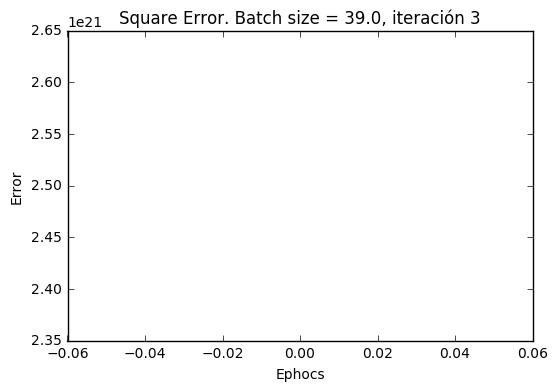

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: 739032752529569.3750 - val_loss: 10190823444123709440.0000
Epoch 2/300
379/379 [==============================] - 0s - loss: 17202883668928449352913526670229504.0000 - val_loss: inf
Epoch 3/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 4/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 5/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 6/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 7/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 8/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 9/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 10/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 11/300
379/

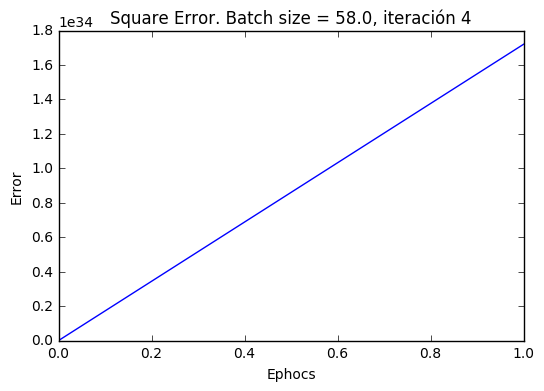

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: 2561135.8351 - val_loss: 23530593884.7244
Epoch 2/300
379/379 [==============================] - 0s - loss: 86976572062104371200.0000 - val_loss: 49195418193288277000192.0000
Epoch 3/300
379/379 [==============================] - 0s - loss: 7233009579720919212616404959232.0000 - val_loss: 4108816415870905866043648766902272.0000
Epoch 4/300
379/379 [==============================] - 0s - loss: inf - val_loss: nan                         
Epoch 5/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 6/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 7/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 8/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 9/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 10/300
379/

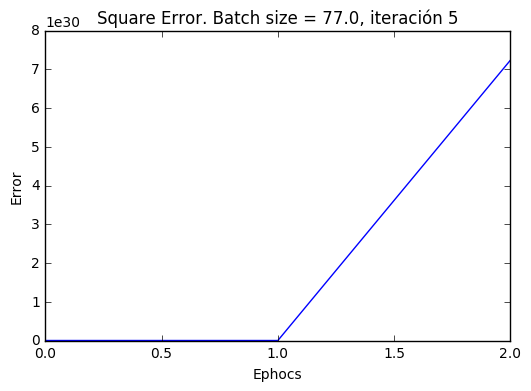

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: 342.9641 - val_loss: 94396.8503
Epoch 2/300
379/379 [==============================] - 0s - loss: 187086579.7131 - val_loss: 77990616571.9685
Epoch 3/300
379/379 [==============================] - 0s - loss: 508093629853635072.0000 - val_loss: 711713769998119337984.0000
Epoch 4/300
379/379 [==============================] - 0s - loss: 4915722932325184526654373888.0000 - val_loss: 7835639292178542811497474555904.0000
Epoch 5/300
379/379 [==============================] - 0s - loss: inf - val_loss: inf                      
Epoch 6/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 7/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 8/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 9/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 10/300
379

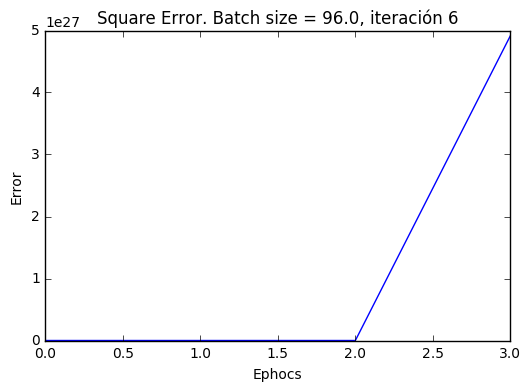

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: 11119.5362 - val_loss: 24233503.2283
Epoch 2/300
379/379 [==============================] - 0s - loss: 34329170470116.2031 - val_loss: 99508426302015376.0000
Epoch 3/300
379/379 [==============================] - 0s - loss: 323720489515929653215232.0000 - val_loss: 1220233552883851991925653504.0000
Epoch 4/300
379/379 [==============================] - 0s - loss: 2752533982330078445759242746986496.0000 - val_loss: inf
Epoch 5/300
379/379 [==============================] - 0s - loss: inf - val_loss: nan
Epoch 6/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 7/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 8/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 9/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 10/300
379/379 [==============

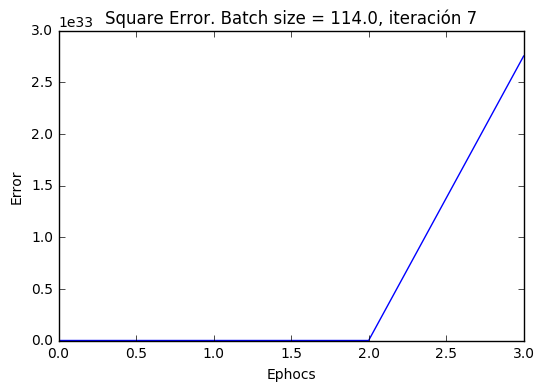

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: 222.8347 - val_loss: 123990.2266
Epoch 2/300
379/379 [==============================] - 0s - loss: 64394.7027 - val_loss: 37184.0078
Epoch 3/300
379/379 [==============================] - 0s - loss: 14614.8809 - val_loss: 2152.1697
Epoch 4/300
379/379 [==============================] - 0s - loss: 1572.9462 - val_loss: 1747.7185
Epoch 5/300
379/379 [==============================] - 0s - loss: 1234.9763 - val_loss: 1596.7559
Epoch 6/300
379/379 [==============================] - 0s - loss: 976.0262 - val_loss: 1511.8687
Epoch 7/300
379/379 [==============================] - 0s - loss: 795.8792 - val_loss: 1443.6829
Epoch 8/300
379/379 [==============================] - 0s - loss: 660.4627 - val_loss: 1412.0286
Epoch 9/300
379/379 [==============================] - 0s - loss: 527.4054 - val_loss: 1352.2717
Epoch 10/300
379/379 [==============================] - 0s - loss: 431.3

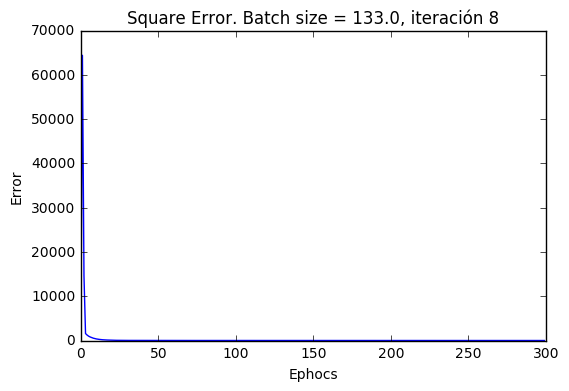

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: 887.0035 - val_loss: 15146.3740
Epoch 2/300
379/379 [==============================] - 0s - loss: 364344837.2870 - val_loss: 555763040256.0000
Epoch 3/300
379/379 [==============================] - 0s - loss: 9209833092103198.0000 - val_loss: 12974120659524255744.0000
Epoch 4/300
379/379 [==============================] - 0s - loss: 181448392302509644840960.0000 - val_loss: 246316772625329249681670144.0000
Epoch 5/300
379/379 [==============================] - 0s - loss: 3220180610414961345688795873280.0000 - val_loss: 3774672298427252977490314022354944.0000
Epoch 6/300
379/379 [==============================] - 0s - loss: inf - val_loss: inf                         
Epoch 7/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 8/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 9/300
379/379 [===================

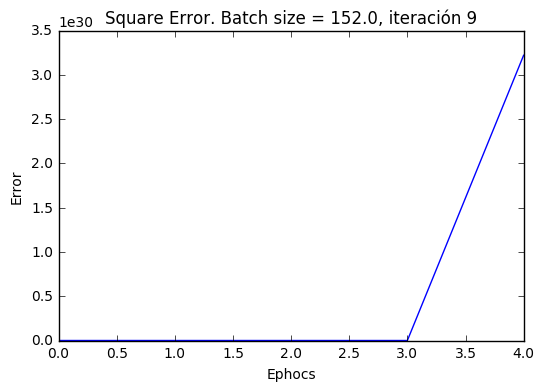

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: 1275.0266 - val_loss: 375896.6250
Epoch 2/300
379/379 [==============================] - 0s - loss: 388608309.0066 - val_loss: 2986584309760.0000
Epoch 3/300
379/379 [==============================] - 0s - loss: 28070417233161192.0000 - val_loss: 79718507275154882560.0000
Epoch 4/300
379/379 [==============================] - 0s - loss: 1826094874197037703757824.0000 - val_loss: 7990477846156341749011709952.0000
Epoch 5/300
379/379 [==============================] - 0s - loss: 181104352829480420980227546546176.0000 - val_loss: 1009055661437534144888020080187670528.0000
Epoch 6/300
379/379 [==============================] - 0s - loss: inf - val_loss: inf                            
Epoch 7/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 8/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 9/300
379/379 [=====

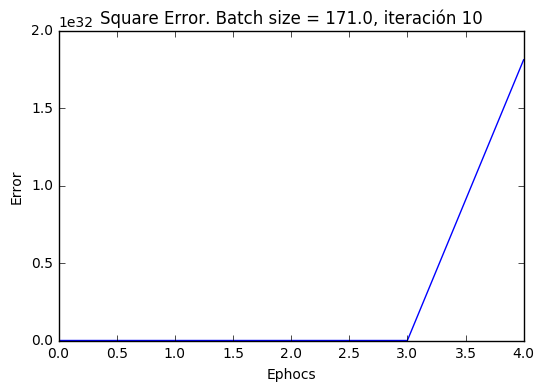

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: 7.5945 - val_loss: 4961.8398
Epoch 2/300
379/379 [==============================] - 0s - loss: 736985.3213 - val_loss: 978729344.0000
Epoch 3/300
379/379 [==============================] - 0s - loss: 789303960480.4221 - val_loss: 1134655734546432.0000
Epoch 4/300
379/379 [==============================] - 0s - loss: 203013296386694624.0000 - val_loss: 103555822608315318272.0000
Epoch 5/300
379/379 [==============================] - 0s - loss: 11904722114206549147648.0000 - val_loss: 6154150876403273302016000.0000
Epoch 6/300
379/379 [==============================] - 0s - loss: 831752930705983077397561344.0000 - val_loss: 411500063993798099803714879488.0000
Epoch 7/300
379/379 [==============================] - 0s - loss: 52765772622312273479436758679552.0000 - val_loss: 28717163578924180342183430151208960.0000
Epoch 8/300
379/379 [==============================] - 0s - loss:

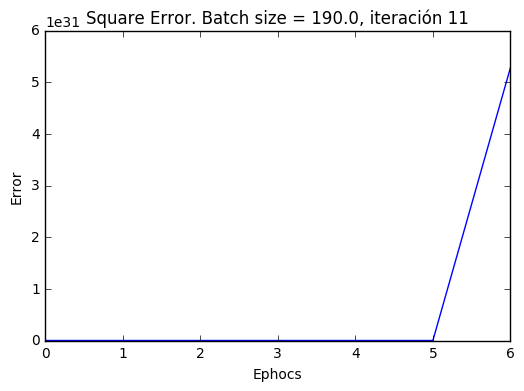

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: 1.0938 - val_loss: 93.9555
Epoch 2/300
379/379 [==============================] - 0s - loss: 14301.2813 - val_loss: 4875.7744
Epoch 3/300
379/379 [==============================] - 0s - loss: 3330.3975 - val_loss: 4246.6265
Epoch 4/300
379/379 [==============================] - 0s - loss: 3380.1533 - val_loss: 423.4559
Epoch 5/300
379/379 [==============================] - 0s - loss: 317.7528 - val_loss: 110.7468
Epoch 6/300
379/379 [==============================] - 0s - loss: 96.5246 - val_loss: 52.8036
Epoch 7/300
379/379 [==============================] - 0s - loss: 46.6234 - val_loss: 25.9622
Epoch 8/300
379/379 [==============================] - 0s - loss: 23.2057 - val_loss: 12.8722
Epoch 9/300
379/379 [==============================] - 0s - loss: 11.7449 - val_loss: 6.5617
Epoch 10/300
379/379 [==============================] - 0s - loss: 6.1509 - val_loss: 3.5608
Epo

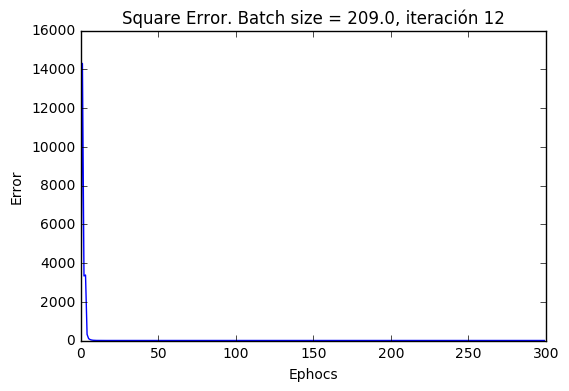

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: 8.9415 - val_loss: 7370.4966
Epoch 2/300
379/379 [==============================] - 0s - loss: 4955.0537 - val_loss: 421.9442
Epoch 3/300
379/379 [==============================] - 0s - loss: 307.9057 - val_loss: 49.6320
Epoch 4/300
379/379 [==============================] - 0s - loss: 37.1298 - val_loss: 7.4415
Epoch 5/300
379/379 [==============================] - 0s - loss: 5.7605 - val_loss: 2.1166
Epoch 6/300
379/379 [==============================] - 0s - loss: 1.8214 - val_loss: 1.4410
Epoch 7/300
379/379 [==============================] - 0s - loss: 1.3176 - val_loss: 1.3402
Epoch 8/300
379/379 [==============================] - 0s - loss: 1.2247 - val_loss: 1.2989
Epoch 9/300
379/379 [==============================] - 0s - loss: 1.1796 - val_loss: 1.2678
Epoch 10/300
379/379 [==============================] - 0s - loss: 1.1404 - val_loss: 1.2399
Epoch 11/300
379/379 

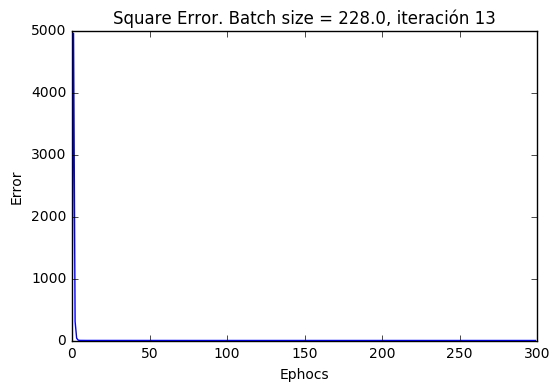

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: 4.0773 - val_loss: 3308.8674
Epoch 2/300
379/379 [==============================] - 0s - loss: 6644.5318 - val_loss: 796410.9375
Epoch 3/300
379/379 [==============================] - 0s - loss: 34783818.9248 - val_loss: 6399548928.0000
Epoch 4/300
379/379 [==============================] - 0s - loss: 546257944570.5963 - val_loss: 409061208096768.0000
Epoch 5/300
379/379 [==============================] - 0s - loss: 33059439036563024.0000 - val_loss: 21120109839623651328.0000
Epoch 6/300
379/379 [==============================] - 0s - loss: 1650082500100701552640.0000 - val_loss: 1053985203013673275097088.0000
Epoch 7/300
379/379 [==============================] - 0s - loss: 82853992791985368007180288.0000 - val_loss: 52381135992198257851710308352.0000
Epoch 8/300
379/379 [==============================] - 0s - loss: 4151877067359003916050683133952.0000 - val_loss: 2626950853

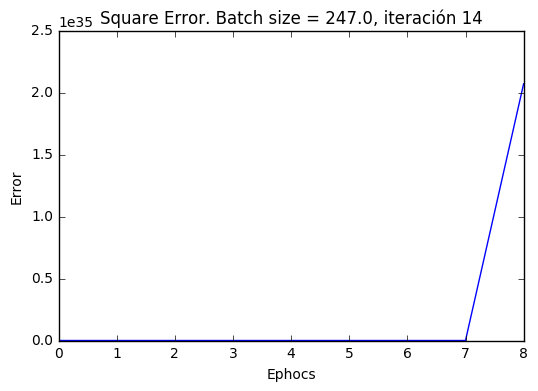

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: 6.2762 - val_loss: 6518.9971
Epoch 2/300
379/379 [==============================] - 0s - loss: 4993.7089 - val_loss: 2793.5349
Epoch 3/300
379/379 [==============================] - 0s - loss: 578529.5464 - val_loss: 457170144.0000
Epoch 4/300
379/379 [==============================] - 0s - loss: 53571819835.9472 - val_loss: 48980255834112.0000
Epoch 5/300
379/379 [==============================] - 0s - loss: 3211145664009629.0000 - val_loss: 1995340788090798080.0000
Epoch 6/300
379/379 [==============================] - 0s - loss: 113809482567140196352.0000 - val_loss: 66117701913796814045184.0000
Epoch 7/300
379/379 [==============================] - 0s - loss: 4045037555869691922087936.0000 - val_loss: 2914240830892859671227400192.0000
Epoch 8/300
379/379 [==============================] - 0s - loss: 226043927909000390217669017600.0000 - val_loss: 1869703782377822540808432

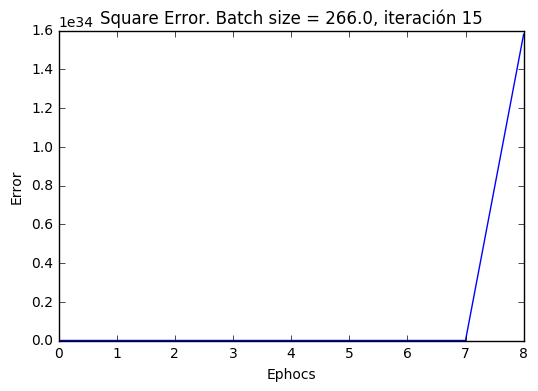

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: 5.6554 - val_loss: 6844.6030
Epoch 2/300
379/379 [==============================] - 0s - loss: 5714.3490 - val_loss: 3855475.0000
Epoch 3/300
379/379 [==============================] - 0s - loss: 793295497.2032 - val_loss: 1161872277504.0000
Epoch 4/300
379/379 [==============================] - 0s - loss: 65607018956870.2422 - val_loss: 92401995125620736.0000
Epoch 5/300
379/379 [==============================] - 0s - loss: 8531552848244392960.0000 - val_loss: 13190412804620350914560.0000
Epoch 6/300
379/379 [==============================] - 0s - loss: 1537987842098956012093440.0000 - val_loss: 3429376636901832767129518080.0000
Epoch 7/300
379/379 [==============================] - 0s - loss: 460766080562563230656754614272.0000 - val_loss: 1120380533508440788482405334777856.0000
Epoch 8/300
379/379 [==============================] - 0s - loss: 141468059066396253311357861163

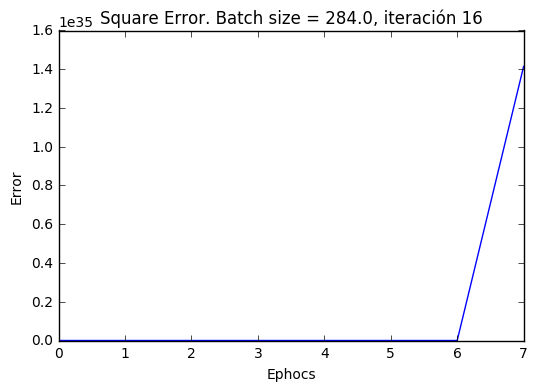

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: 1.1042 - val_loss: 218.6676
Epoch 2/300
379/379 [==============================] - 0s - loss: 13420.8730 - val_loss: 21733384.0000
Epoch 3/300
379/379 [==============================] - 0s - loss: 1511523664.1530 - val_loss: 1958342033408.0000
Epoch 4/300
379/379 [==============================] - 0s - loss: 100878166329889.7812 - val_loss: 152372382961500160.0000
Epoch 5/300
379/379 [==============================] - 0s - loss: 13818737594050037760.0000 - val_loss: 33255203397052133277696.0000
Epoch 6/300
379/379 [==============================] - 0s - loss: 2726581859733892742774784.0000 - val_loss: 5045359822015238902554558464.0000
Epoch 7/300
379/379 [==============================] - 0s - loss: 468138157881243060181456125952.0000 - val_loss: 1096574018097953461760889001607168.0000
Epoch 8/300
379/379 [==============================] - 0s - loss: 9467992393208654918603468

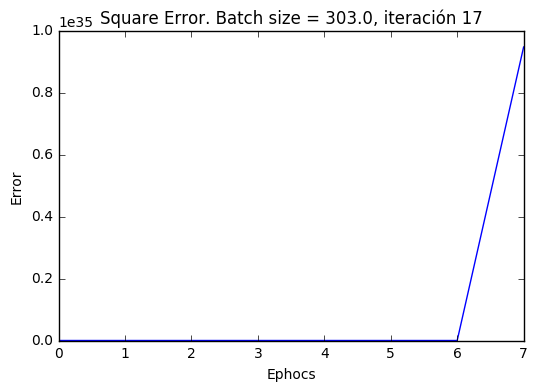

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: 1.9475 - val_loss: 2387.4832
Epoch 2/300
379/379 [==============================] - 0s - loss: 10876.8014 - val_loss: 120783.0234
Epoch 3/300
379/379 [==============================] - 0s - loss: 14378406.0085 - val_loss: 63642107904.0000
Epoch 4/300
379/379 [==============================] - 0s - loss: 5030030599138.2803 - val_loss: 9520359799783424.0000
Epoch 5/300
379/379 [==============================] - 0s - loss: 623487516829485568.0000 - val_loss: 1404278377334486073344.0000
Epoch 6/300
379/379 [==============================] - 0s - loss: 83426227049061054152704.0000 - val_loss: 160585105267650413226622976.0000
Epoch 7/300
379/379 [==============================] - 0s - loss: 10828589591543644769298153472.0000 - val_loss: 27250099504181731028274935496704.0000
Epoch 8/300
379/379 [==============================] - 0s - loss: 1670590017416312314061470606295040.0000 - v

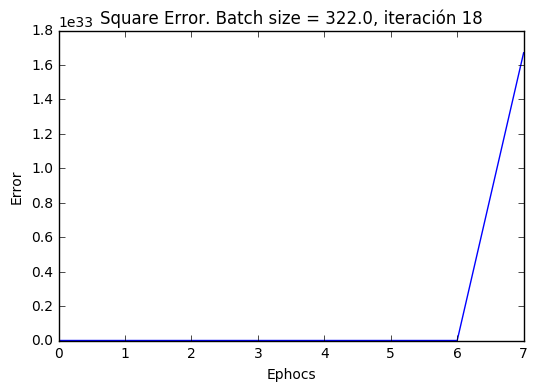

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: 1.3793 - val_loss: 1445.8196
Epoch 2/300
379/379 [==============================] - 0s - loss: 13700.7241 - val_loss: 13683281.0000
Epoch 3/300
379/379 [==============================] - 0s - loss: 1880839396.4195 - val_loss: 19822825963520.0000
Epoch 4/300
379/379 [==============================] - 0s - loss: 1130093823057639.0000 - val_loss: 4682183955221315584.0000
Epoch 5/300
379/379 [==============================] - 0s - loss: 182911839109909839872.0000 - val_loss: 784528712412603275542528.0000
Epoch 6/300
379/379 [==============================] - 0s - loss: 32828026432071660512215040.0000 - val_loss: 157705723765542476558951776256.0000
Epoch 7/300
379/379 [==============================] - 0s - loss: 5172046855306186508187440513024.0000 - val_loss: 17216979150471836798932418413199360.0000
Epoch 8/300
379/379 [==============================] - 0s - loss: 71224359596698

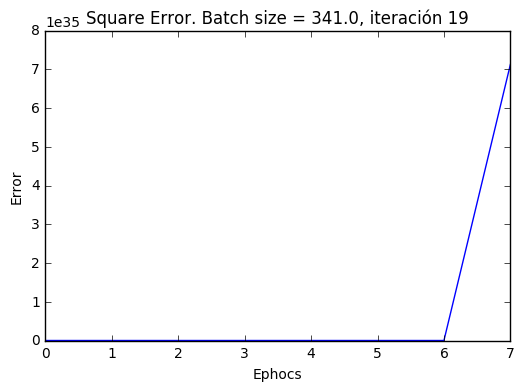

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: 1.3608 - val_loss: 2622.1636
Epoch 2/300
379/379 [==============================] - 0s - loss: 4199.5691 - val_loss: 216073.2656
Epoch 3/300
379/379 [==============================] - 0s - loss: 10856716.3539 - val_loss: 135613366272.0000
Epoch 4/300
379/379 [==============================] - 0s - loss: 4683343110165.6152 - val_loss: 32676478407671808.0000
Epoch 5/300
379/379 [==============================] - 0s - loss: 263136436362067584.0000 - val_loss: 500923634972142600192.0000
Epoch 6/300
379/379 [==============================] - 0s - loss: 5320605799288780357632.0000 - val_loss: 15212134017579187697614848.0000
Epoch 7/300
379/379 [==============================] - 0s - loss: 177564226066486658265513984.0000 - val_loss: 615705693256139460934885179392.0000
Epoch 8/300
379/379 [==============================] - 0s - loss: 7205569210136929911847834877952.0000 - val_loss: 

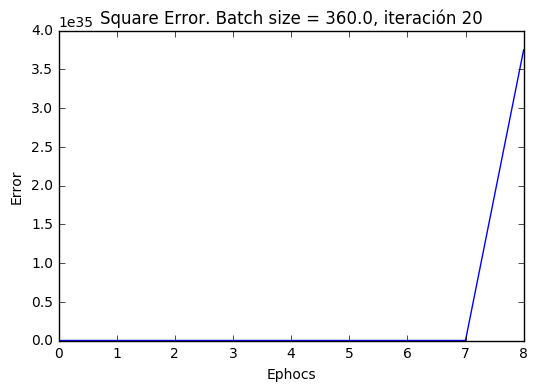

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: 1.0769 - val_loss: 30.3741
Epoch 2/300
379/379 [==============================] - 0s - loss: 30.3624 - val_loss: 10767.6074
Epoch 3/300
379/379 [==============================] - 0s - loss: 10767.9648 - val_loss: 1569.5328
Epoch 4/300
379/379 [==============================] - 0s - loss: 1569.2924 - val_loss: 565.1414
Epoch 5/300
379/379 [==============================] - 0s - loss: 565.0481 - val_loss: 204.0241
Epoch 6/300
379/379 [==============================] - 0s - loss: 203.9886 - val_loss: 74.1299
Epoch 7/300
379/379 [==============================] - 0s - loss: 74.1219 - val_loss: 27.3974
Epoch 8/300
379/379 [==============================] - 0s - loss: 27.4038 - val_loss: 10.5816
Epoch 9/300
379/379 [==============================] - 0s - loss: 10.5961 - val_loss: 4.5297
Epoch 10/300
379/379 [==============================] - 0s - loss: 4.5486 - val_loss: 2.3509
Epo

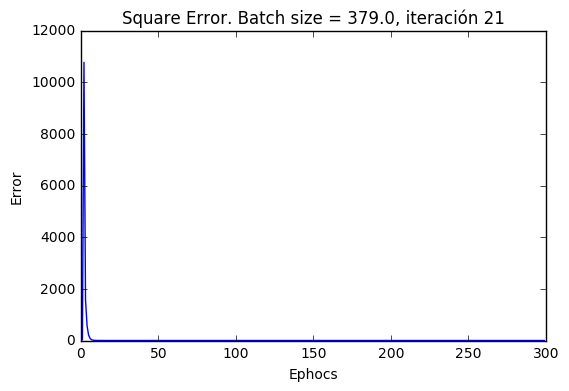

In [173]:
i = 1
for b in batch_sizes:
    model = Sequential()
    model.add(Dense(200, input_dim=X_train_scaled.shape[1], init='uniform'))
    model.add(Activation('sigmoid'))
    model.add(Dense(1, init='uniform'))
    model.add(Activation('linear'))

    sgd = SGD(lr=0.2)
    model.compile(optimizer=sgd,loss='mean_squared_error')

    hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300, verbose=1, batch_size=b, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
    # Graficamos
    plt.plot(hist.history['loss'])
    plt.title("Square Error. Batch size = {0}, iteración {1}".format(b, i))
    plt.xlabel('Ephocs')
    plt.ylabel('Error')
    plt.show()
    i += 1

Los gráficos muestran que para ciertos valores de *batch_size* se consigue la convergencia del método con errores considerables. Para el resto de los valores no hay convergencia (los puntos que logran obtener un gráfico obtiene valores del order de magnitud 1e35 por lo que el método diverge).

Ahora, utilizaremos la función Relu con los distintos valores para el tamaño del batch.

Train on 379 samples, validate on 127 samples
Epoch 1/300
369/379 [============================>.] - ETA: 0s - loss: nan

/Users/asanhuez/.miniconda2/envs/python3/lib/python3.5/site-packages/keras/engine/training.py:810: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  batch_ids = index_array[batch_start:batch_end]
/Users/asanhuez/.miniconda2/envs/python3/lib/python3.5/site-packages/keras/engine/training.py:917: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  batch_ids = index_array[batch_start:batch_end]


379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 2/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 3/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 4/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 5/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 6/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 7/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 8/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 9/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 10/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 11/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 12/300
379/379 [==============================] - 0s - los

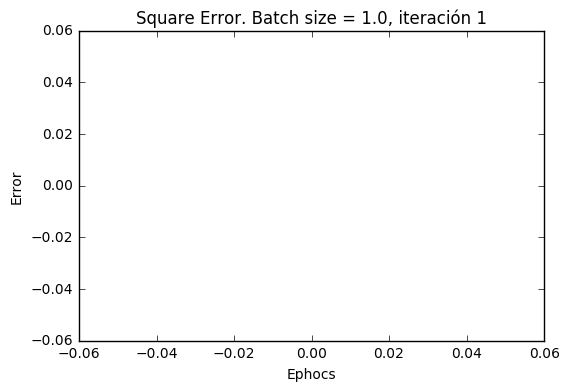

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: 0.3910 - val_loss: 0.4345
Epoch 2/300
379/379 [==============================] - 0s - loss: 0.2178 - val_loss: 0.4075
Epoch 3/300
379/379 [==============================] - 0s - loss: 0.1988 - val_loss: 0.3313
Epoch 4/300
379/379 [==============================] - 0s - loss: 0.1505 - val_loss: 0.4341
Epoch 5/300
379/379 [==============================] - 0s - loss: 0.1815 - val_loss: 0.2606
Epoch 6/300
379/379 [==============================] - 0s - loss: 0.1357 - val_loss: 0.3343
Epoch 7/300
379/379 [==============================] - 0s - loss: 0.1365 - val_loss: 0.2858
Epoch 8/300
379/379 [==============================] - 0s - loss: 0.1253 - val_loss: 0.2376
Epoch 9/300
379/379 [==============================] - 0s - loss: 0.1217 - val_loss: 0.2385
Epoch 10/300
379/379 [==============================] - 0s - loss: 0.1130 - val_loss: 0.2886
Epoch 11/300
379/379 [===========

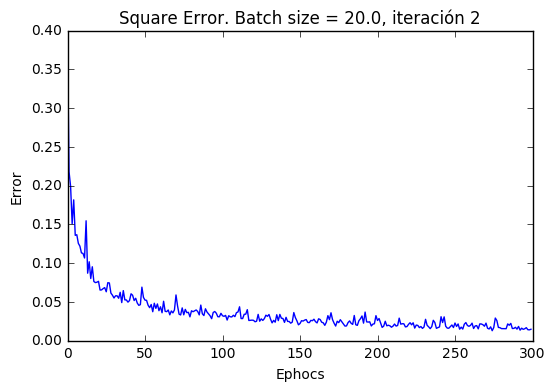

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: 0.4986 - val_loss: 0.4481
Epoch 2/300
379/379 [==============================] - 0s - loss: 0.2086 - val_loss: 0.4020
Epoch 3/300
379/379 [==============================] - 0s - loss: 0.1737 - val_loss: 0.3311
Epoch 4/300
379/379 [==============================] - 0s - loss: 0.1559 - val_loss: 0.2668
Epoch 5/300
379/379 [==============================] - 0s - loss: 0.1501 - val_loss: 0.2919
Epoch 6/300
379/379 [==============================] - 0s - loss: 0.1420 - val_loss: 0.3413
Epoch 7/300
379/379 [==============================] - 0s - loss: 0.1394 - val_loss: 0.2327
Epoch 8/300
379/379 [==============================] - 0s - loss: 0.1447 - val_loss: 0.2900
Epoch 9/300
379/379 [==============================] - 0s - loss: 0.1271 - val_loss: 0.2588
Epoch 10/300
379/379 [==============================] - 0s - loss: 0.1193 - val_loss: 0.2624
Epoch 11/300
379/379 [===========

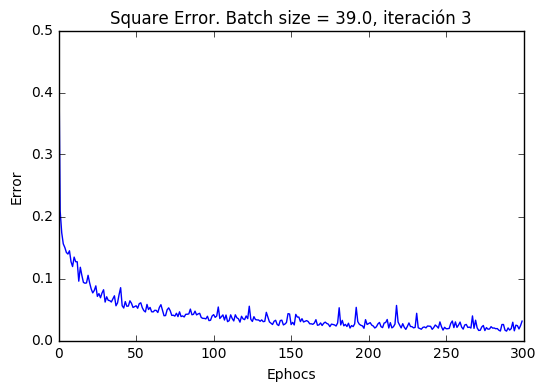

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: 0.6075 - val_loss: 0.5837
Epoch 2/300
379/379 [==============================] - 0s - loss: 0.2545 - val_loss: 0.3696
Epoch 3/300
379/379 [==============================] - 0s - loss: 0.1899 - val_loss: 0.4005
Epoch 4/300
379/379 [==============================] - 0s - loss: 0.1723 - val_loss: 0.3721
Epoch 5/300
379/379 [==============================] - 0s - loss: 0.1545 - val_loss: 0.2569
Epoch 6/300
379/379 [==============================] - 0s - loss: 0.1759 - val_loss: 0.2747
Epoch 7/300
379/379 [==============================] - 0s - loss: 0.1404 - val_loss: 0.3298
Epoch 8/300
379/379 [==============================] - 0s - loss: 0.1254 - val_loss: 0.2830
Epoch 9/300
379/379 [==============================] - 0s - loss: 0.1408 - val_loss: 0.2480
Epoch 10/300
379/379 [==============================] - 0s - loss: 0.1232 - val_loss: 0.2819
Epoch 11/300
379/379 [===========

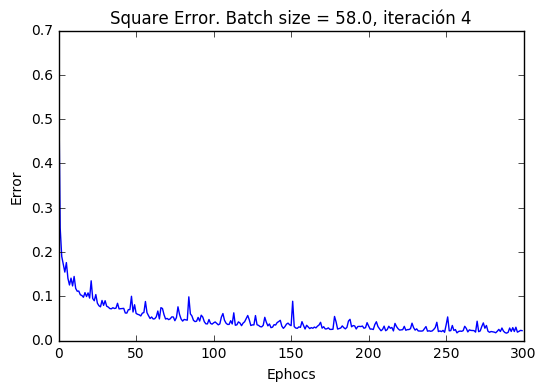

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: 0.7091 - val_loss: 0.5253
Epoch 2/300
379/379 [==============================] - 0s - loss: 0.2766 - val_loss: 0.3988
Epoch 3/300
379/379 [==============================] - 0s - loss: 0.1977 - val_loss: 0.3667
Epoch 4/300
379/379 [==============================] - 0s - loss: 0.1720 - val_loss: 0.3323
Epoch 5/300
379/379 [==============================] - 0s - loss: 0.1641 - val_loss: 0.3045
Epoch 6/300
379/379 [==============================] - 0s - loss: 0.1522 - val_loss: 0.3116
Epoch 7/300
379/379 [==============================] - 0s - loss: 0.1461 - val_loss: 0.2867
Epoch 8/300
379/379 [==============================] - 0s - loss: 0.1562 - val_loss: 0.2914
Epoch 9/300
379/379 [==============================] - 0s - loss: 0.1551 - val_loss: 0.3098
Epoch 10/300
379/379 [==============================] - 0s - loss: 0.1249 - val_loss: 0.2656
Epoch 11/300
379/379 [===========

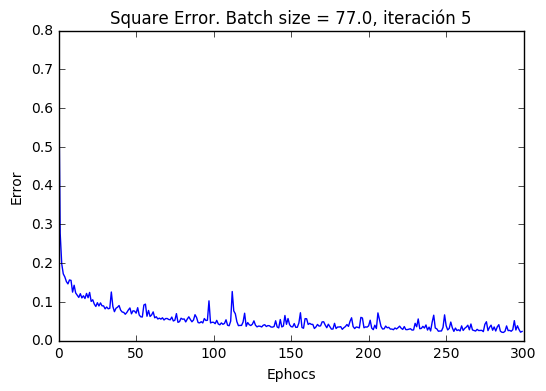

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: 0.7336 - val_loss: 0.5839
Epoch 2/300
379/379 [==============================] - 0s - loss: 0.3138 - val_loss: 0.4395
Epoch 3/300
379/379 [==============================] - 0s - loss: 0.2126 - val_loss: 0.4247
Epoch 4/300
379/379 [==============================] - 0s - loss: 0.1960 - val_loss: 0.3643
Epoch 5/300
379/379 [==============================] - 0s - loss: 0.1726 - val_loss: 0.3772
Epoch 6/300
379/379 [==============================] - 0s - loss: 0.1768 - val_loss: 0.3345
Epoch 7/300
379/379 [==============================] - 0s - loss: 0.1519 - val_loss: 0.2946
Epoch 8/300
379/379 [==============================] - 0s - loss: 0.1494 - val_loss: 0.2927
Epoch 9/300
379/379 [==============================] - 0s - loss: 0.1399 - val_loss: 0.3009
Epoch 10/300
379/379 [==============================] - 0s - loss: 0.1364 - val_loss: 0.2945
Epoch 11/300
379/379 [===========

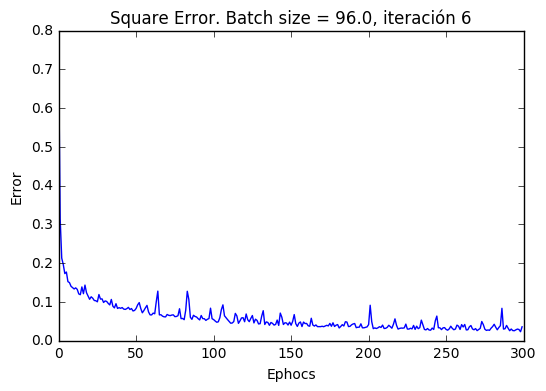

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: 0.8112 - val_loss: 0.6245
Epoch 2/300
379/379 [==============================] - 0s - loss: 0.3610 - val_loss: 0.4581
Epoch 3/300
379/379 [==============================] - 0s - loss: 0.2282 - val_loss: 0.3786
Epoch 4/300
379/379 [==============================] - 0s - loss: 0.1847 - val_loss: 0.3858
Epoch 5/300
379/379 [==============================] - 0s - loss: 0.1729 - val_loss: 0.3590
Epoch 6/300
379/379 [==============================] - 0s - loss: 0.1603 - val_loss: 0.2954
Epoch 7/300
379/379 [==============================] - 0s - loss: 0.1511 - val_loss: 0.3763
Epoch 8/300
379/379 [==============================] - 0s - loss: 0.1579 - val_loss: 0.3147
Epoch 9/300
379/379 [==============================] - 0s - loss: 0.1369 - val_loss: 0.2813
Epoch 10/300
379/379 [==============================] - 0s - loss: 0.1379 - val_loss: 0.3009
Epoch 11/300
379/379 [===========

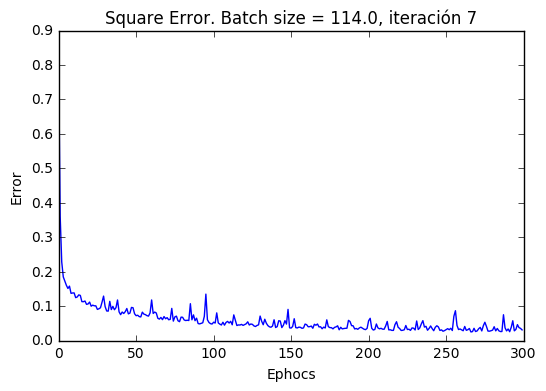

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: 0.8237 - val_loss: 0.6501
Epoch 2/300
379/379 [==============================] - 0s - loss: 0.4029 - val_loss: 0.5348
Epoch 3/300
379/379 [==============================] - 0s - loss: 0.2707 - val_loss: 0.3951
Epoch 4/300
379/379 [==============================] - 0s - loss: 0.2030 - val_loss: 0.3698
Epoch 5/300
379/379 [==============================] - 0s - loss: 0.1877 - val_loss: 0.3271
Epoch 6/300
379/379 [==============================] - 0s - loss: 0.1670 - val_loss: 0.3180
Epoch 7/300
379/379 [==============================] - 0s - loss: 0.1625 - val_loss: 0.3105
Epoch 8/300
379/379 [==============================] - 0s - loss: 0.1537 - val_loss: 0.2947
Epoch 9/300
379/379 [==============================] - 0s - loss: 0.1477 - val_loss: 0.2955
Epoch 10/300
379/379 [==============================] - 0s - loss: 0.1453 - val_loss: 0.2919
Epoch 11/300
379/379 [===========

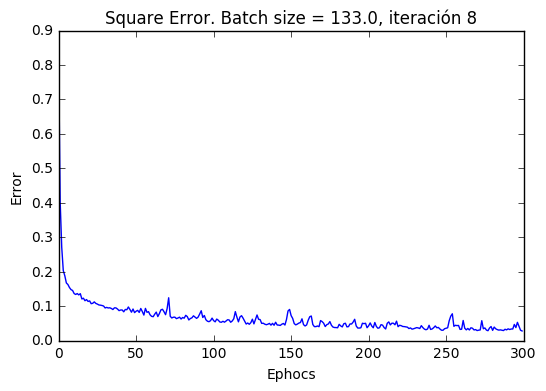

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: 0.8591 - val_loss: 0.6531
Epoch 2/300
379/379 [==============================] - 0s - loss: 0.4418 - val_loss: 0.5428
Epoch 3/300
379/379 [==============================] - 0s - loss: 0.2989 - val_loss: 0.4436
Epoch 4/300
379/379 [==============================] - 0s - loss: 0.2151 - val_loss: 0.3685
Epoch 5/300
379/379 [==============================] - 0s - loss: 0.1819 - val_loss: 0.3425
Epoch 6/300
379/379 [==============================] - 0s - loss: 0.1710 - val_loss: 0.3175
Epoch 7/300
379/379 [==============================] - 0s - loss: 0.1574 - val_loss: 0.3346
Epoch 8/300
379/379 [==============================] - 0s - loss: 0.1522 - val_loss: 0.2925
Epoch 9/300
379/379 [==============================] - 0s - loss: 0.1508 - val_loss: 0.2913
Epoch 10/300
379/379 [==============================] - 0s - loss: 0.1425 - val_loss: 0.3086
Epoch 11/300
379/379 [===========

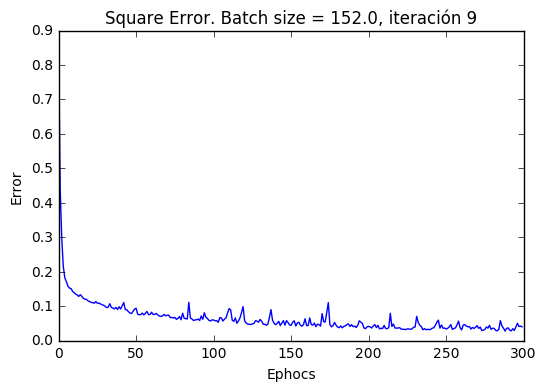

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: 0.8752 - val_loss: 0.6544
Epoch 2/300
379/379 [==============================] - 0s - loss: 0.4466 - val_loss: 0.5156
Epoch 3/300
379/379 [==============================] - 0s - loss: 0.3047 - val_loss: 0.4721
Epoch 4/300
379/379 [==============================] - 0s - loss: 0.2088 - val_loss: 0.3566
Epoch 5/300
379/379 [==============================] - 0s - loss: 0.1807 - val_loss: 0.3523
Epoch 6/300
379/379 [==============================] - 0s - loss: 0.1688 - val_loss: 0.2927
Epoch 7/300
379/379 [==============================] - 0s - loss: 0.1587 - val_loss: 0.2987
Epoch 8/300
379/379 [==============================] - 0s - loss: 0.1506 - val_loss: 0.3132
Epoch 9/300
379/379 [==============================] - 0s - loss: 0.1596 - val_loss: 0.2936
Epoch 10/300
379/379 [==============================] - 0s - loss: 0.1403 - val_loss: 0.3037
Epoch 11/300
379/379 [===========

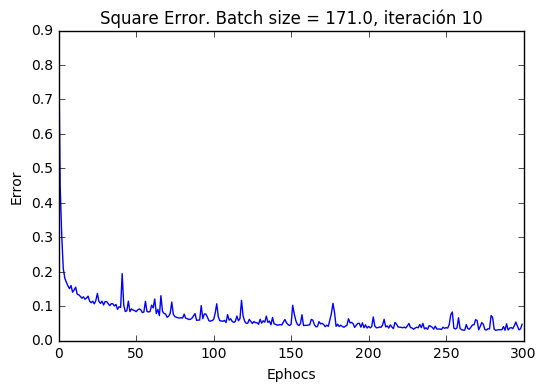

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: 0.8804 - val_loss: 0.7355
Epoch 2/300
379/379 [==============================] - 0s - loss: 0.5723 - val_loss: 0.6069
Epoch 3/300
379/379 [==============================] - 0s - loss: 0.3781 - val_loss: 0.5166
Epoch 4/300
379/379 [==============================] - 0s - loss: 0.2787 - val_loss: 0.4419
Epoch 5/300
379/379 [==============================] - 0s - loss: 0.2261 - val_loss: 0.4026
Epoch 6/300
379/379 [==============================] - 0s - loss: 0.1960 - val_loss: 0.3753
Epoch 7/300
379/379 [==============================] - 0s - loss: 0.1806 - val_loss: 0.3571
Epoch 8/300
379/379 [==============================] - 0s - loss: 0.1717 - val_loss: 0.3454
Epoch 9/300
379/379 [==============================] - 0s - loss: 0.1681 - val_loss: 0.3314
Epoch 10/300
379/379 [==============================] - 0s - loss: 0.1632 - val_loss: 0.3254
Epoch 11/300
379/379 [===========

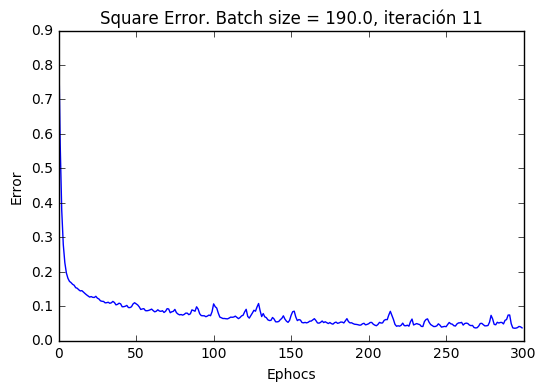

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: 0.9381 - val_loss: 0.7619
Epoch 2/300
379/379 [==============================] - 0s - loss: 0.6268 - val_loss: 0.6027
Epoch 3/300
379/379 [==============================] - 0s - loss: 0.3981 - val_loss: 0.5186
Epoch 4/300
379/379 [==============================] - 0s - loss: 0.2826 - val_loss: 0.4501
Epoch 5/300
379/379 [==============================] - 0s - loss: 0.2245 - val_loss: 0.3970
Epoch 6/300
379/379 [==============================] - 0s - loss: 0.1933 - val_loss: 0.3771
Epoch 7/300
379/379 [==============================] - 0s - loss: 0.1792 - val_loss: 0.3564
Epoch 8/300
379/379 [==============================] - 0s - loss: 0.1738 - val_loss: 0.3465
Epoch 9/300
379/379 [==============================] - 0s - loss: 0.1711 - val_loss: 0.3419
Epoch 10/300
379/379 [==============================] - 0s - loss: 0.1617 - val_loss: 0.3427
Epoch 11/300
379/379 [===========

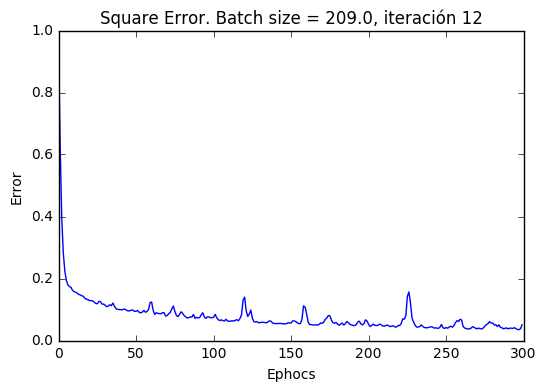

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: 0.9287 - val_loss: 0.7457
Epoch 2/300
379/379 [==============================] - 0s - loss: 0.6024 - val_loss: 0.6091
Epoch 3/300
379/379 [==============================] - 0s - loss: 0.3927 - val_loss: 0.5347
Epoch 4/300
379/379 [==============================] - 0s - loss: 0.2872 - val_loss: 0.4557
Epoch 5/300
379/379 [==============================] - 0s - loss: 0.2240 - val_loss: 0.4077
Epoch 6/300
379/379 [==============================] - 0s - loss: 0.1964 - val_loss: 0.3771
Epoch 7/300
379/379 [==============================] - 0s - loss: 0.1851 - val_loss: 0.3495
Epoch 8/300
379/379 [==============================] - 0s - loss: 0.1735 - val_loss: 0.3547
Epoch 9/300
379/379 [==============================] - 0s - loss: 0.1677 - val_loss: 0.3397
Epoch 10/300
379/379 [==============================] - 0s - loss: 0.1633 - val_loss: 0.3335
Epoch 11/300
379/379 [===========

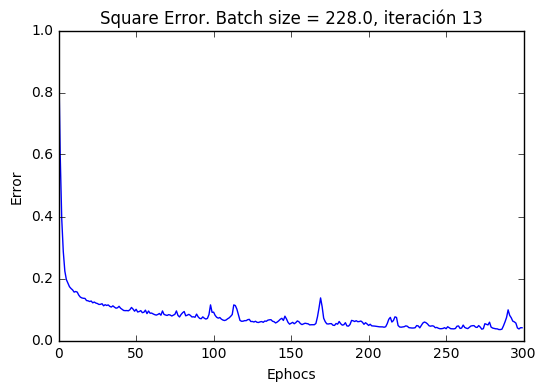

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: 0.9076 - val_loss: 0.7245
Epoch 2/300
379/379 [==============================] - 0s - loss: 0.5742 - val_loss: 0.5985
Epoch 3/300
379/379 [==============================] - 0s - loss: 0.3813 - val_loss: 0.5330
Epoch 4/300
379/379 [==============================] - 0s - loss: 0.2834 - val_loss: 0.4402
Epoch 5/300
379/379 [==============================] - 0s - loss: 0.2237 - val_loss: 0.4062
Epoch 6/300
379/379 [==============================] - 0s - loss: 0.1930 - val_loss: 0.3773
Epoch 7/300
379/379 [==============================] - 0s - loss: 0.1793 - val_loss: 0.3485
Epoch 8/300
379/379 [==============================] - 0s - loss: 0.1758 - val_loss: 0.3163
Epoch 9/300
379/379 [==============================] - 0s - loss: 0.1651 - val_loss: 0.3500
Epoch 10/300
379/379 [==============================] - 0s - loss: 0.1635 - val_loss: 0.3268
Epoch 11/300
379/379 [===========

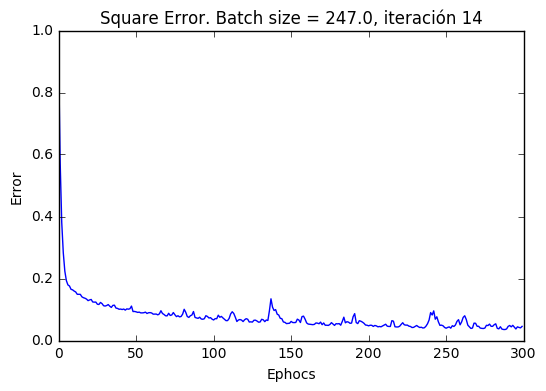

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: 0.9787 - val_loss: 0.7928
Epoch 2/300
379/379 [==============================] - 0s - loss: 0.6826 - val_loss: 0.6349
Epoch 3/300
379/379 [==============================] - 0s - loss: 0.4507 - val_loss: 0.5361
Epoch 4/300
379/379 [==============================] - 0s - loss: 0.3211 - val_loss: 0.4748
Epoch 5/300
379/379 [==============================] - 0s - loss: 0.2523 - val_loss: 0.4351
Epoch 6/300
379/379 [==============================] - 0s - loss: 0.2185 - val_loss: 0.4134
Epoch 7/300
379/379 [==============================] - 0s - loss: 0.1978 - val_loss: 0.3858
Epoch 8/300
379/379 [==============================] - 0s - loss: 0.1823 - val_loss: 0.3455
Epoch 9/300
379/379 [==============================] - 0s - loss: 0.1756 - val_loss: 0.3436
Epoch 10/300
379/379 [==============================] - 0s - loss: 0.1651 - val_loss: 0.3405
Epoch 11/300
379/379 [===========

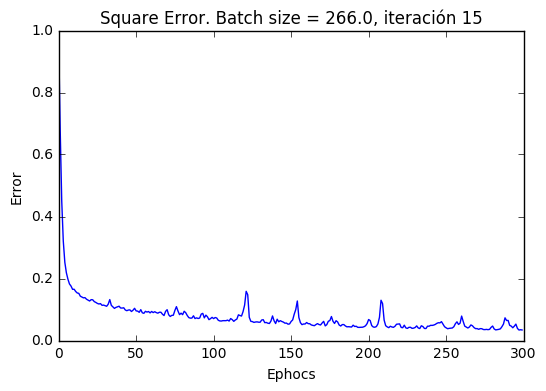

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: 0.9519 - val_loss: 0.7448
Epoch 2/300
379/379 [==============================] - 0s - loss: 0.6321 - val_loss: 0.5928
Epoch 3/300
379/379 [==============================] - 0s - loss: 0.3911 - val_loss: 0.5409
Epoch 4/300
379/379 [==============================] - 0s - loss: 0.3139 - val_loss: 0.4560
Epoch 5/300
379/379 [==============================] - 0s - loss: 0.2403 - val_loss: 0.4174
Epoch 6/300
379/379 [==============================] - 0s - loss: 0.2060 - val_loss: 0.3857
Epoch 7/300
379/379 [==============================] - 0s - loss: 0.1956 - val_loss: 0.3465
Epoch 8/300
379/379 [==============================] - 0s - loss: 0.1785 - val_loss: 0.3529
Epoch 9/300
379/379 [==============================] - 0s - loss: 0.1720 - val_loss: 0.3357
Epoch 10/300
379/379 [==============================] - 0s - loss: 0.1659 - val_loss: 0.3152
Epoch 11/300
379/379 [===========

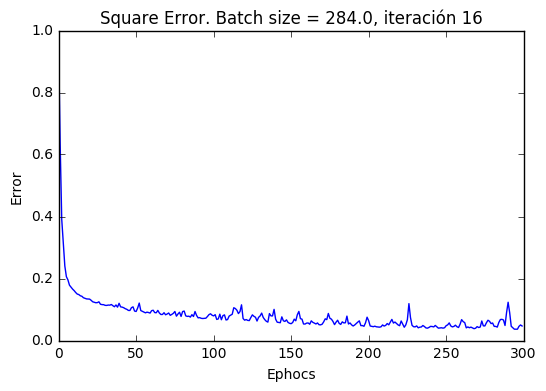

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: 0.9724 - val_loss: 0.7464
Epoch 2/300
379/379 [==============================] - 0s - loss: 0.6241 - val_loss: 0.5916
Epoch 3/300
379/379 [==============================] - 0s - loss: 0.3892 - val_loss: 0.5385
Epoch 4/300
379/379 [==============================] - 0s - loss: 0.2893 - val_loss: 0.4744
Epoch 5/300
379/379 [==============================] - 0s - loss: 0.2451 - val_loss: 0.4318
Epoch 6/300
379/379 [==============================] - 0s - loss: 0.2109 - val_loss: 0.5158
Epoch 7/300
379/379 [==============================] - 0s - loss: 0.2567 - val_loss: 0.3547
Epoch 8/300
379/379 [==============================] - 0s - loss: 0.1749 - val_loss: 0.3405
Epoch 9/300
379/379 [==============================] - 0s - loss: 0.1627 - val_loss: 0.3135
Epoch 10/300
379/379 [==============================] - 0s - loss: 0.1602 - val_loss: 0.3083
Epoch 11/300
379/379 [===========

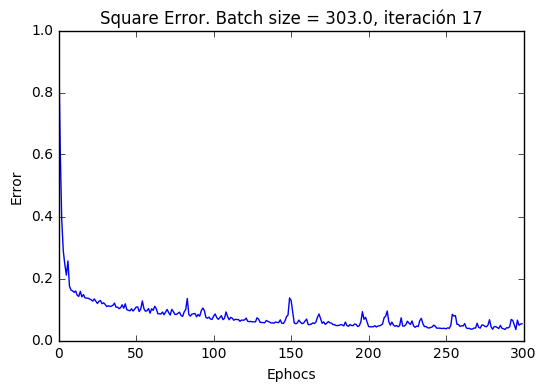

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: 0.9742 - val_loss: 0.7606
Epoch 2/300
379/379 [==============================] - 0s - loss: 0.6471 - val_loss: 0.6139
Epoch 3/300
379/379 [==============================] - 0s - loss: 0.3995 - val_loss: 0.5312
Epoch 4/300
379/379 [==============================] - 0s - loss: 0.2985 - val_loss: 0.4734
Epoch 5/300
379/379 [==============================] - 0s - loss: 0.2416 - val_loss: 0.4233
Epoch 6/300
379/379 [==============================] - 0s - loss: 0.2125 - val_loss: 0.4123
Epoch 7/300
379/379 [==============================] - 0s - loss: 0.1976 - val_loss: 0.3570
Epoch 8/300
379/379 [==============================] - 0s - loss: 0.1823 - val_loss: 0.3473
Epoch 9/300
379/379 [==============================] - 0s - loss: 0.1770 - val_loss: 0.3053
Epoch 10/300
379/379 [==============================] - 0s - loss: 0.1729 - val_loss: 0.3226
Epoch 11/300
379/379 [===========

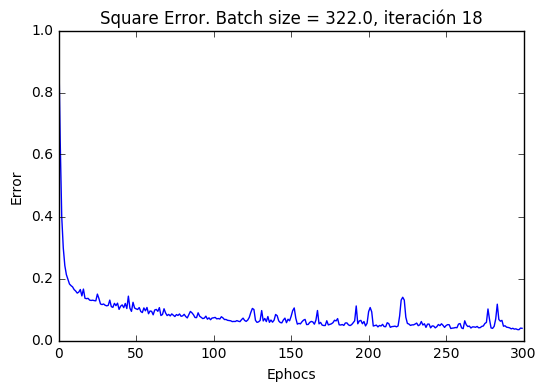

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: 1.0142 - val_loss: 0.7634
Epoch 2/300
379/379 [==============================] - 0s - loss: 0.6745 - val_loss: 0.6223
Epoch 3/300
379/379 [==============================] - 0s - loss: 0.4240 - val_loss: 0.5600
Epoch 4/300
379/379 [==============================] - 0s - loss: 0.3254 - val_loss: 0.5183
Epoch 5/300
379/379 [==============================] - 0s - loss: 0.2644 - val_loss: 0.4447
Epoch 6/300
379/379 [==============================] - 0s - loss: 0.2192 - val_loss: 0.4321
Epoch 7/300
379/379 [==============================] - 0s - loss: 0.1992 - val_loss: 0.3326
Epoch 8/300
379/379 [==============================] - 0s - loss: 0.1889 - val_loss: 0.3161
Epoch 9/300
379/379 [==============================] - 0s - loss: 0.1930 - val_loss: 0.3335
Epoch 10/300
379/379 [==============================] - 0s - loss: 0.1656 - val_loss: 0.3290
Epoch 11/300
379/379 [===========

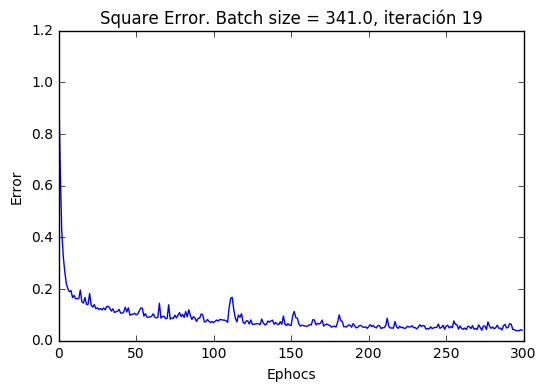

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: 1.0016 - val_loss: 0.8380
Epoch 2/300
379/379 [==============================] - 0s - loss: 0.7371 - val_loss: 0.6994
Epoch 3/300
379/379 [==============================] - 0s - loss: 0.5058 - val_loss: 0.6736
Epoch 4/300
379/379 [==============================] - 0s - loss: 0.4114 - val_loss: 0.6132
Epoch 5/300
379/379 [==============================] - 0s - loss: 0.3808 - val_loss: 0.5966
Epoch 6/300
379/379 [==============================] - 0s - loss: 0.3507 - val_loss: 0.3851
Epoch 7/300
379/379 [==============================] - 0s - loss: 0.2175 - val_loss: 0.4246
Epoch 8/300
379/379 [==============================] - 0s - loss: 0.2120 - val_loss: 0.3693
Epoch 9/300
379/379 [==============================] - 0s - loss: 0.1841 - val_loss: 0.3795
Epoch 10/300
379/379 [==============================] - 0s - loss: 0.1771 - val_loss: 0.5045
Epoch 11/300
379/379 [===========

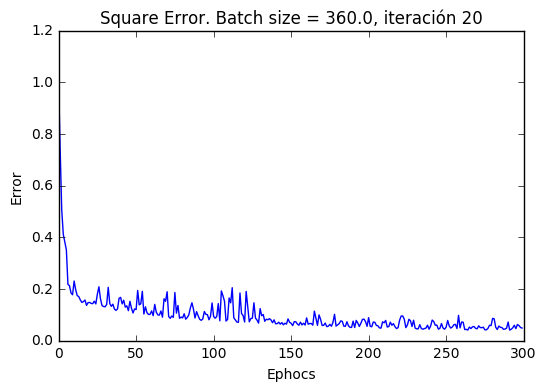

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: 1.0031 - val_loss: 0.8423
Epoch 2/300
379/379 [==============================] - 0s - loss: 0.8005 - val_loss: 0.7301
Epoch 3/300
379/379 [==============================] - 0s - loss: 0.6411 - val_loss: 0.6435
Epoch 4/300
379/379 [==============================] - 0s - loss: 0.5014 - val_loss: 0.5904
Epoch 5/300
379/379 [==============================] - 0s - loss: 0.4016 - val_loss: 0.5533
Epoch 6/300
379/379 [==============================] - 0s - loss: 0.3368 - val_loss: 0.5155
Epoch 7/300
379/379 [==============================] - 0s - loss: 0.2899 - val_loss: 0.4790
Epoch 8/300
379/379 [==============================] - 0s - loss: 0.2539 - val_loss: 0.4475
Epoch 9/300
379/379 [==============================] - 0s - loss: 0.2272 - val_loss: 0.4222
Epoch 10/300
379/379 [==============================] - 0s - loss: 0.2082 - val_loss: 0.4026
Epoch 11/300
379/379 [===========

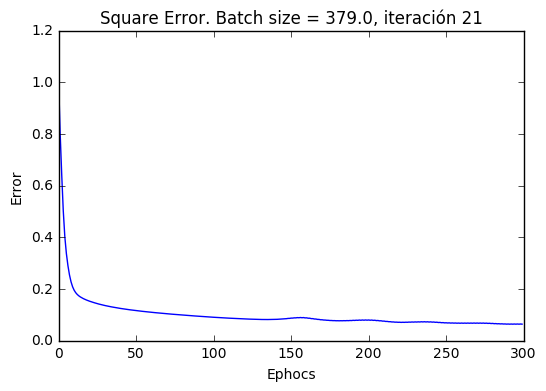

In [174]:
i = 1
for b in batch_sizes:
    model = Sequential()
    model.add(Dense(200, input_dim=X_train_scaled.shape[1], init='uniform'))
    model.add(Activation('relu'))
    model.add(Dense(1, init='uniform'))
    model.add(Activation('linear'))

    sgd = SGD(lr=0.2)
    model.compile(optimizer=sgd,loss='mean_squared_error')

    hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300, verbose=1, batch_size=b, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
    # Graficamos
    plt.plot(hist.history['loss'])
    plt.title("Square Error. Batch size = {0}, iteración {1}".format(b, i))
    plt.xlabel('Ephocs')
    plt.ylabel('Error')
    plt.show()
    i += 1

El método se comportó bien para todos los tamaños de batch (con excepción de batch de tamaño uno). La forma de la curva fue similar para todos los otros casos.